## Supermarket Transactions Dataset --- Marketing Analytics

### Group - 5 ---> Apurva Chatterjee (Team Leader),  Harshit Wadhera, Amrit Pritam, , Simran Agrawal and Akshay Pahwa ###

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales = pd.read_excel("C:/Users/apurva/Desktop/ProjectData/MarketSales.xlsx")
sales.head()

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,...,CLIENTCODE,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER
0,11738.0,5863.0,SPRITE 1 LT LIMON AROMALI GAZOZ,18456,2017-01-07,1.0,2.00,2.00,1.85,52.0,...,467369,Sercan KIZILOK,156,SPRİTE,İÇECEK,GAZLI İÇECEK,GAZOZ,2017-01-08 16:16:11,2017-01-08 16:17:13,E
1,10537.0,8.0,TOZ SEKER,18105,2017-01-06,5.0,2.65,13.25,12.27,8.0,...,131464,İsmet ŞINGIR,NaN,NaN,İÇECEK,ÇAY KAHVE,SEKER TATLANDIRICI,2017-01-07 11:04:34,2017-01-07 11:05:37,E
2,11335.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,...,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
3,11336.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,...,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
4,10115.0,12808.0,FALIM SAKIZ 5LI CILEK,18005,2017-01-05,1.0,0.40,0.40,0.37,41.0,...,447336,Habibe AYSAN,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-06 14:00:30,2017-01-06 14:01:03,K


In [4]:
sales.shape
# Original transactions data containing approximately 611K rows and 26 columns.
# We have transactions details for each region, city and branch.

(611108, 26)

In [5]:
sales['REGION'].value_counts()
# There are 7 regions in total.

Marmara              175660
İç Anadolu            96122
Ege                   87172
Akdeniz               75737
Karadeniz             67629
Güneydoğu Anadolu     63849
Doğu Anadolu          44938
Name: REGION, dtype: int64

In [6]:
sales['CITY'].value_counts()
# we have 81 unique cities

İstanbul     113622
Ankara        40695
İzmir         32328
Bursa         21215
Antalya       17371
              ...  
Kilis          1195
Gümüşhane      1187
Ardahan         734
Tunceli         563
Bayburt         528
Name: CITY, Length: 81, dtype: int64

In [7]:
sales['BRANCH'].value_counts()
# we have 81 unique cities and 81 unique branches. So, we can safely state that each city has one store each, so there are 
# 81 stores or branches in total.

İstanbul Subesi     113622
Ankara Subesi        40695
İzmir Subesi         32328
Bursa Subesi         21215
Antalya Subesi       17371
                     ...  
Kilis Subesi          1195
Gümüşhane Subesi      1187
Ardahan Subesi         734
Tunceli Subesi         563
Bayburt Subesi         528
Name: BRANCH, Length: 81, dtype: int64

In [8]:
lst = {}
for i,v in sales['REGION'].value_counts().iteritems():
    lst.update({i:len(sales[sales["REGION"] == i]['BRANCH'].unique())})

print('Number of branches for each Region')
print(lst)

Number of branches for each Region
{'Marmara': 10, 'İç Anadolu': 13, 'Ege': 9, 'Akdeniz': 8, 'Karadeniz': 18, 'Güneydoğu Anadolu': 9, 'Doğu Anadolu': 14}


In [9]:
# We have selected 'Akideniz' region for our analysis, it has 8 branches and 75,737 transactions. The primary reason for this
# is to reduce unecessary complexity, without reducing the quality of our analysis.
sample_region= sales[sales["REGION"]=="Akdeniz"]

In [10]:
# creating a seperate file for the filtered dataset
sample_region.to_csv("C:/Users/harshit/Desktop/ProjectData/sample_region.csv")

In [11]:
df = pd.read_csv('Market.csv')
df.head()

C:\Users\Apurva\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (18,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Unnamed: 0.1,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,...,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER,Unnamed: 27
0,0,1,10537,8.0,TOZ SEKER,18105,1/6/2017 0:00,5.000,2.65,13.25,...,İsmet ŞINGIR,NaN,DOGUS,İÇECEK,ÇAY KAHVE,SEKER TATLANDIRICI,1/7/2017 11:04,1/7/2017 11:05,E,NaN
1,1,11,10304,11340.0,VIVIDENT CZD FRUIT SWING 14 ADET 26 GR,18040,1/5/2017 0:00,1.000,1.95,1.95,...,Rahime KASAP,148,VİVİDENT,GIDA,SAKIZ SEKERLEME,SAKIZ,1/6/2017 19:52,1/6/2017 19:52,K,NaN
2,2,21,5137,5780.0,SALKIM DOMATES,16853,1/5/2017 0:00,1.035,5.20,5.38,...,Yüksel GENÇBAY,A25,HAL,MEYVE SEBZE,SEBZE,NaN,1/6/2017 19:12,1/6/2017 19:12,K,NaN
3,3,22,5068,5715.0,PATATES,16840,1/5/2017 0:00,1.205,2.45,2.95,...,Bayram YAROL,A25,HAL,MEYVE SEBZE,SEBZE,NaN,1/6/2017 17:44,1/6/2017 17:44,E,NaN
4,4,30,3487,5711.0,HAVUC,16593,1/5/2017 0:00,1.040,1.80,1.87,...,Zeki DERELİ,A25,HAL,MEYVE SEBZE,SEBZE,NaN,1/6/2017 20:08,1/6/2017 20:09,E,NaN


## Univariate Analysis

#### ID (Transaction ID) (Categorical)

In [4]:
print('DataType',df['ID'].dtype)
print('We have {} number of transactions and {} unique values'.format(df['ID'].count(),len(df['ID'].unique())))
# All Transactions have unique ID and there are no null values.
# Data type is 'float64', we will transform it to integers.

DataType int64
We have 75737 number of transactions and 75737 unique values


In [5]:
df['ID'] = df['ID'].astype('int64')
df['ID'].dtype
# All values in the column were intially in 'float64' format and now, they are integers.

dtype('int64')

#### ITEMCODE 

In [6]:
df['ITEMCODE'].dtype

dtype('float64')

In [7]:
(df['ITEMCODE'].isnull().sum()/len(df['ID']))*100

1.1434305557389386

In [13]:
# Dropping the rows with Null values in 'ITEMCODE'.
df.drop(df[df['ITEMCODE'].isna()].index, inplace = True)

In [14]:
(df['ITEMCODE'].isnull().sum()/len(df['ID']))*100

0.0

In [15]:
# converting datatype to Integer
df['ITEMCODE'] = df['ITEMCODE'].astype('int64')
df['ITEMCODE'].dtype

dtype('int64')

In [20]:
itemcd = df['ITEMCODE'].value_counts(sort=True, ascending=False)
itemcd.describe()
# 6332 Unique items
# On an average 12 items were sold for each item with SD of 38
# Max items sold were 1160

count    6332.000000
mean       11.824226
std        38.111802
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max      1160.000000
Name: ITEMCODE, dtype: float64

In [21]:
itemcd[0:10]
# Top 10 values sold

7        1160
5694      757
5715      749
5701      651
8         635
5716      621
5461      517
20885     484
5711      478
5717      477
Name: ITEMCODE, dtype: int64

In [22]:
#df['ITEMCODE'].value_counts(sort=True, ascending=True)[0:10]
itemcd[itemcd==1]
# Low performing items, only 1 unit sold from last 3 months.

11213    1
19309    1
12857    1
21618    1
4872     1
        ..
6877     1
5714     1
13556    1
4828     1
5075     1
Name: ITEMCODE, Length: 1701, dtype: int64

#### ITEMNAME

In [23]:
df['ITEMNAME'].dtype

dtype('O')

In [24]:
(df['ITEMNAME'].isnull().sum()/len(df['ID']))*100

0.0

In [25]:
itemnm = df['ITEMNAME'].value_counts(sort=True, ascending=False)
itemnm.describe()
# 6303 unique items sold
# On an average 12 items were sold for each item with SD of 38
# Max items sold were 1160

count    6303.000000
mean       11.878629
std        38.193822
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max      1160.000000
Name: ITEMNAME, dtype: float64

In [26]:
itemnm[0:10]
# Top 10 items sold

EKMEK 250 GR           1160
DOMATES                 757
PATATES                 749
PORTAKAL                651
TOZ SEKER               635
SOGAN                   621
KIVIRCIK                517
OSMANCIK PIRINC KG.     484
HAVUC                   478
LIMON                   477
Name: ITEMNAME, dtype: int64

In [27]:
itemnm[itemnm==1]
# Low performing items, only 1 unit sold from last 3 months.

CARTE DOR SUTLAC 143GR                      1
MARC DEO SIVI 900ML SARIGULLER              1
ARIEL MATIK 1,5 KG DAĞ ESINTISI             1
ICIM PUDING CILEKLI 125GR                   1
AKAT GARDI SAC SPREYI 450 ML                1
                                           ..
COLGATE D.F.TWISTER EKONOMIK AILE PAKETI    1
NESTLE PASTANEM KOSTEBEK  120               1
ULKER KELLOGG`S CORN FLAKES 500 GR POSET    1
SOKE UN ALTIN HARMAN 1KG                    1
ECOMY CAY KASIGI 6'LI                       1
Name: ITEMNAME, Length: 1688, dtype: int64

#### FICHENO (Invoice #)

In [28]:
df['FICHENO'].dtypes
# All values in the column are integers.

dtype('int64')

In [29]:
df['FICHENO'].isnull().sum()
# There are no Null values in the column.

0

In [30]:
inv = df['FICHENO'].value_counts(sort=True, ascending=False)
inv.describe()
# We have 17,675 unique invoices.
# Atleast one item is purchased in every invoice.
# On an average 4.26 items are purchased in every invoice with SD of 5.6 items.
# Top 10 invoices per # of transactions.
# Maximum # of items purchased in a single invoice is 102

count    17675.000000
mean         4.235983
std          5.652335
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        102.000000
Name: FICHENO, dtype: float64

In [31]:
# Top 10 invoices per transaction
inv[0:10]

119754    102
23410      79
33144      78
151512     77
16413      77
72506      75
149165     64
96032      63
79761      62
128561     62
Name: FICHENO, dtype: int64

In [32]:
inv[inv<5]
# 12,924 invoices have less than 5 items purchased.

48976     4
105333    4
17011     4
85059     4
42740     4
         ..
90047     1
83096     1
141264    1
139223    1
151562    1
Name: FICHENO, Length: 12924, dtype: int64

#### DATE_

In [33]:
df['DATE_'].dtype

dtype('O')

In [34]:
df['DATE_'] = df['DATE_'].astype('datetime64[ns]')
df['DATE_'].dtype
# All values in the column were intially in 'Object' format and now, they have been converted to date.

dtype('<M8[ns]')

In [35]:
df['DATE_'].isnull().sum()
# There are no Null values in the column.

0

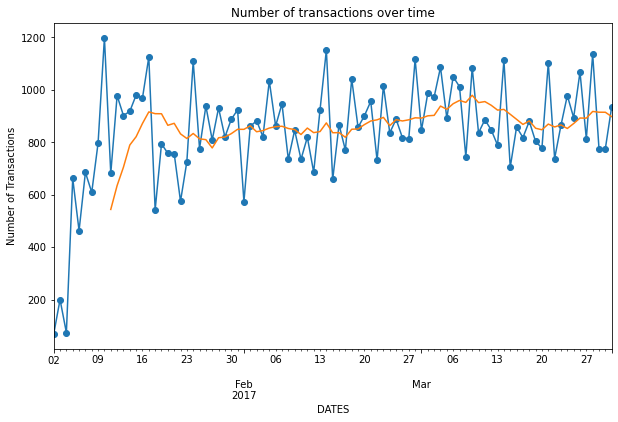

In [36]:
plt.figure(figsize=(10,6))
df['DATE_'].value_counts().sort_index().plot(marker='o')
plt.xlabel('DATES')
plt.ylabel('Number of Transactions')
plt.title('Number of transactions over time')
df['DATE_'].value_counts().sort_index().rolling(window=10).mean().plot()
plt.show()
# After 10th of January number of transaction are showing an overall stable trend.

In [37]:
df['DATE_'].value_counts().describe()
# On an Average 841 transactions happen per day with a standard deviation of 200 transactions.
# Max 1199 transactions per day and min 68 transactions per day have happened over past 3 years.

count      89.000000
mean      841.247191
std       200.660516
min        68.000000
25%       770.000000
50%       857.000000
75%       956.000000
max      1199.000000
Name: DATE_, dtype: float64

#### Extracting features out of date column

In [38]:
# 'DNAME' for Day
df['DNAME'] = df['DATE_'].dt.day_name()
# Adding column day name having days name corresponding to all the dates.

#### Day

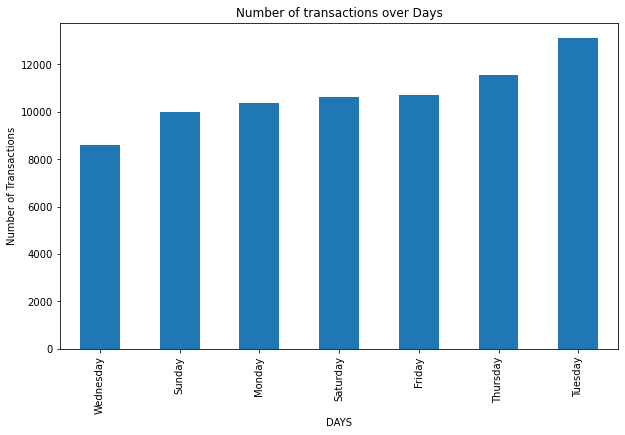

In [39]:
plt.figure(figsize=(10,6))
df['DNAME'].value_counts().sort_values().plot(kind='bar')
plt.xlabel('DAYS')
plt.ylabel('Number of Transactions')
plt.title('Number of transactions over Days')
plt.show()
# Overall, number of transactions are same for every day, except for tuesdays and wednesdays.
# The number of transaction are relatively high for Tuesdays as compared to Wednesdays.

In [40]:
# 'WNAME' for Week
df['WNAME'] = df['DATE_'].dt.week

#### Week

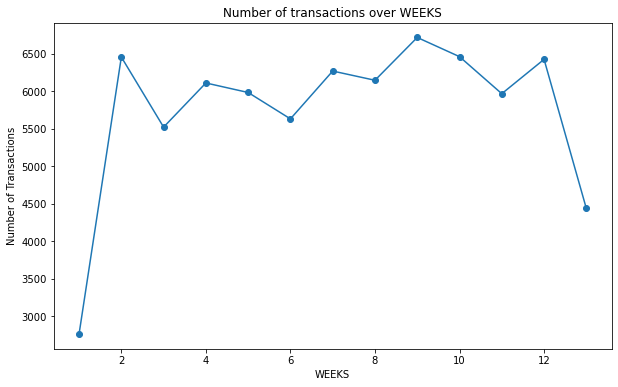

In [41]:
plt.figure(figsize=(10,6))
df['WNAME'].value_counts().sort_index().plot(marker='o')
plt.xlabel('WEEKS')
plt.ylabel('Number of Transactions')
plt.title('Number of transactions over WEEKS')
plt.show()
# Number of transactions, week wise are also stable.

In [42]:
df['WNAME'].value_counts().describe()
# Average 5,760 transactions per week with SD of 1,071 

count      13.000000
mean     5759.307692
std      1071.283761
min      2761.000000
25%      5630.000000
50%      6109.000000
75%      6424.000000
max      6716.000000
Name: WNAME, dtype: float64

In [43]:
df['MNAME'] = df['DATE_'].dt.month_name()
# Adding column month name having months name corresponding to all the dates.

#### Month

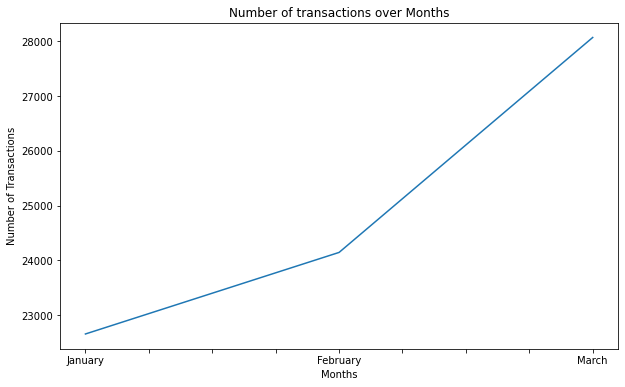

In [44]:
plt.figure(figsize=(10,6))
df['MNAME'].value_counts().sort_values().plot()
plt.xlabel('Months')
plt.ylabel('Number of Transactions')
plt.title('Number of transactions over Months')
plt.show()
# Highest number of transactions in March, followed by February and January.
# Increasing trend in monthly # of transactions.

In [45]:
df['MNAME'].value_counts().describe()

count        3.00000
mean     24957.00000
std       2796.84769
min      22656.00000
25%      23400.50000
50%      24145.00000
75%      26107.50000
max      28070.00000
Name: MNAME, dtype: float64

#### Amount

In [46]:
df['AMOUNT'].dtype

dtype('float64')

In [47]:
df['AMOUNT'].isnull().sum()
# There are no Null values in the column.

0

In [48]:
df['AMOUNT'].describe()

count    74871.000000
mean         1.284234
std          3.121508
min          0.001000
25%          1.000000
50%          1.000000
75%          1.000000
max        502.000000
Name: AMOUNT, dtype: float64

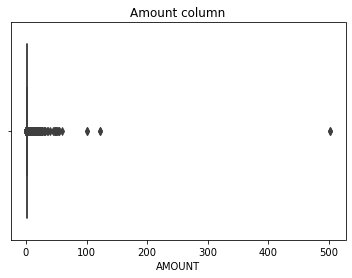

In [49]:
sns.boxplot(data=df, x='AMOUNT')
plt.title('Amount column')
plt.show()
# These outliers are of no concern.
# No Distribution since, range is very low.

#### Price

In [50]:
df['PRICE'].dtype

dtype('float64')

In [51]:
df['PRICE'].isnull().sum()
# There are no Null values in the column.

0

In [52]:
df['PRICE'].describe()

count    74871.000000
mean         3.993322
std          4.976383
min          0.010000
25%          1.050000
50%          2.350000
75%          4.750000
max        101.000000
Name: PRICE, dtype: float64

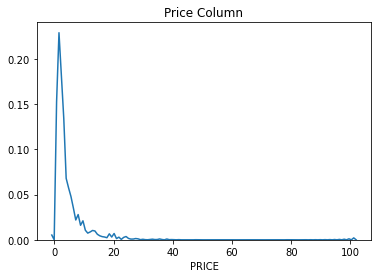

In [53]:
sns.distplot(df['PRICE'], hist=False, kde=True)
plt.title('Price Column')
plt.show()

#### LINENETTOTAL

In [54]:
df['LINENETTOTAL'].dtype

dtype('float64')

In [55]:
df['LINENETTOTAL'].isnull().sum()
# There are no Null values in the column.

0

In [56]:
df['LINENETTOTAL'].describe()
# Difficult to visualize distribution.

count    74871.000000
mean         4.112561
std         15.359253
min          0.010000
25%          1.250000
50%          2.450000
75%          4.990000
max       2761.000000
Name: LINENETTOTAL, dtype: float64

#### LINENET

In [57]:
df['LINENET'].dtype

dtype('float64')

In [58]:
df['LINENET'].isnull().sum()

0

In [59]:
df['LINENET'].describe()
# Difficult to visualize distribution.

count    74871.000000
mean         3.794499
std         15.203104
min          0.010000
25%          1.140000
50%          2.240000
75%          4.580000
max       2761.000000
Name: LINENET, dtype: float64

In [ ]:
# sns.distplot(df['LINENET'], hist=True, kde=True)
# plt.title('LINENETTOTAL Column')
# plt.show()

#### Feature Extraction - Discount percentage

In [60]:
# creating new column discount percentage .
df["DISCOUNT_PERCENTAGE"]=((df["LINENETTOTAL"]-df["LINENET"])/df["LINENETTOTAL"])*100

In [61]:
df["DISCOUNT_PERCENTAGE"].dtype

dtype('float64')

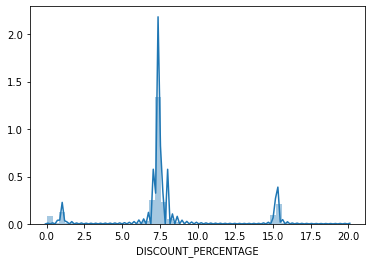

In [62]:
sns.distplot(df["DISCOUNT_PERCENTAGE"], hist=True, kde=True)
plt.show()

In [63]:
df["DISCOUNT_PERCENTAGE"].describe()

count    74871.000000
mean         7.808479
std          3.485928
min          0.000000
25%          7.260726
50%          7.414830
75%          7.619048
max         20.000000
Name: DISCOUNT_PERCENTAGE, dtype: float64

#### BRANCHNR & BRANCH

In [64]:
len(df['BRANCHNR'].unique())

8

In [65]:
len(df['BRANCH'].unique())

8

In [66]:
df['BRANCHNR'].dtype

dtype('float64')

In [67]:
df['BRANCH'].dtype

dtype('O')

In [68]:
df["BRANCH"].isnull().sum()

0

In [69]:
df["BRANCHNR"].isnull().sum()

0

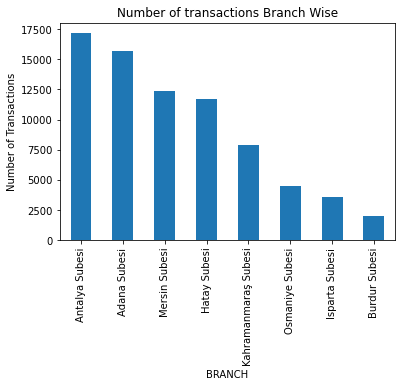

In [70]:
df['BRANCH'].value_counts().plot(kind='bar')
plt.xlabel('BRANCH')
plt.ylabel('Number of Transactions')
plt.title('Number of transactions Branch Wise')
plt.show()

In [71]:
df['BRANCH'].value_counts().describe()

count        8.000000
mean      9358.875000
std       5726.051555
min       1980.000000
25%       4262.500000
50%       9799.000000
75%      13194.500000
max      17179.000000
Name: BRANCH, dtype: float64

#### SALESMAN

In [72]:
df['SALESMAN'].dtype

dtype('O')

In [73]:
(df['SALESMAN'].isnull().sum()/len(df['ID']))*100

0.0

In [74]:
sman = df['SALESMAN'].value_counts(sort=True, ascending=False)
sman.describe()

count      91.000000
mean      822.758242
std      1119.958584
min         1.000000
25%         8.000000
50%       308.000000
75%      1513.500000
max      4085.000000
Name: SALESMAN, dtype: float64

In [75]:
sman[0:10]
# Top 10 Salesman 

Duygu TEKİNSİZ      4085
Bedirhan FIRÇACI    3999
Cennet BEĞENDİK     3937
Masal ATASEVEN      3810
Cennet İDİS         3761
Duygu GÖGSU         2648
Aylin ÇEVİKOĞLU     2526
Ebubekir GÜLEÇ      2465
Ebubekir SUVEREN    2455
Eren PRODÜKSİYON    2274
Name: SALESMAN, dtype: int64

In [76]:
sman[sman<250]
# Salesman who have sold less than 250 items in past 3 months.

Türkan KÜÇÜKİRAVUL      20
Türkan OGULTEKEN        18
Türkan KAPKIN           17
Türkan GÖKBEL           17
Türkan ÜNGÖR            17
Türkan MOLLA            14
Türkan APİLİOĞULLARI    12
Türkan KAHVECİLER       11
Ali ÖZKOL               11
Türkan ERGÜZER          11
Türkan HESAPÇIOĞLU      11
Türkan GÖZTOK           10
Türkan TOKTAY           10
Türkan GÖKSUN           10
Türkan ÖZTEL            10
Türkan KOCATEPE          9
Türkan KALKANCI          9
Türkan MİĞRA             8
Türkan AKÇASI            8
Türkan UZUNKAYA          8
Türkan GÜLÇİCEK          7
Türkan BOYLA             7
Türkan AKÇIL             7
Türkan MEVSİM            6
Türkan SELMA             6
Hiranur ÖZKOL            4
Türkan KÖMÜRLÜOĞLU       4
Türkan ÖZBAY             4
Türkan KAPTANOĞLU        3
Türkan ÜĞÜTEN            3
Türkan İŞSEVER           3
Türkan KAYIS             2
Türkan ÇEKEN             2
Türkan KONYALI           2
Türkan ALIŞMAZ           2
Öznur ELKATMIŞ           2
Türkan BAYRI             2
A

#### CITY

In [77]:
# Dropping City column since for every city we have only one branch.
df.drop(columns=['CITY'], inplace=True)

#### REGION

In [78]:
# Dropping Region as it has only one value.
df.drop(columns=['REGION'], inplace=True)

#### LATITUDE & LONGITUDE

In [79]:
# Dropping Latitude and Longitude column as they are out of context for our analysis.
df.drop(columns=['LATITUDE', 'LONGITUDE'], inplace=True)

#### CLIENTCODE

In [80]:
df['CLIENTCODE'].dtype

dtype('O')

In [81]:
df['CLIENTCODE'].isnull().sum()

2354

In [82]:
df[df['CLIENTCODE'] == 0]
# No 0 values in the column

,Unnamed: 0,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,...,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER,DNAME,WNAME,MNAME,DISCOUNT_PERCENTAGE


In [83]:
df['CLIENTCODE'].fillna(0, inplace=True)

In [84]:
df['CLIENTCODE'].isnull().sum()

0

In [85]:
# replacing null value with invoice# with 'A' affixed in the end
for j in df['CLIENTCODE'].iteritems():
    if j[1] == 0:
        df['CLIENTCODE'][j[0]] = str(df['FICHENO'][j[0]]) + 'A'
        print(df['CLIENTCODE'][j[0]])

<ipython-input-85-3f2884d9e373>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CLIENTCODE'][j[0]] = str(df['FICHENO'][j[0]]) + 'A'


17643A
17643A
15588A
17643A
15588A
15588A
15756A
17864A
16199A
21602A
23091A
148017A
55282A
55213A
147904A
16977A
15897A
17091A
18788A
18788A
15588A
15756A
19006A
143973A
20940A
16741A
20434A
20434A
20434A
20893A
19698A
19698A
16977A
20893A
15756A
19006A
19006A
19006A
19006A
18788A
18788A
17253A
17253A
17253A
58645A
58645A
40046A
40046A
24804A
18304A
21602A
23371A
23371A
17189A
17253A
23078A
23078A
23078A
147850A
58645A
57329A
59354A
59354A
59697A
17189A
22977A
22997A
19328A
143973A
46278A
46278A
41659A
44110A
44110A
143973A
25284A
25396A
19006A
21024A
25736A
25736A
24804A
24804A
21024A
26003A
18788A
18788A
23371A
48233A
48233A
47572A
47572A
46353A
47572A
47572A
46353A
154928A
83388A
83388A
83481A
99905A
99905A
99881A
100448A
65550A
65550A
70239A
70239A
70762A
70762A
29320A
23371A
23371A
23371A
19698A
19698A
21602A
19698A
25396A
26264A
26264A
41495A
41495A
41495A
41127A
42820A
42820A
41495A
42820A
42946A
42820A
42820A
42820A
42820A
42820A
42820A
42820A
42946A
43314A
72240A
59868A
60000

110750A
110750A
110750A
110750A
114051A
114051A
114051A
122318A
72917A
74759A
74759A
74759A
110100A
109793A
110100A
110100A
110100A
110100A
110100A
111765A
111765A
111836A
116697A
116697A
116697A
117027A
117027A
117027A
117027A
152634A
106463A
106463A
106463A
106463A
106349A
109793A
115885A
115885A
111836A
111689A
111689A
74735A
74735A
74735A
77520A
111765A
111765A
112904A
107629A
107629A
107629A
107629A
107629A
107629A
107686A
107686A
79539A
79808A
79767A
79702A
80852A
80852A
80212A
80212A
80212A
139263A
139277A
139263A
130722A
130853A
80323A
80323A
80278A
80212A
80212A
80323A
81871A
81941A
81913A
81913A
133572A
134846A
134913A
134913A
135214A
117027A
114030A
114030A
107629A
107629A
107686A
108279A
108187A
106993A
106993A
75605A
75848A
75848A
76211A
76211A
76211A
76835A
74735A
74735A
137246A
90881A
90239A
93955A
93955A
93955A
94104A
93955A
93955A
93955A
94087A
93955A
93955A
93955A
94087A
93955A
94104A
94096A
94096A
94096A
94096A
94096A
94087A
94096A
94096A
94096A
94096A
109441A
145671

135214A
134654A
134654A
134654A
134654A
134532A
134532A
134532A
134654A
134654A
134654A
134654A
134654A
134654A
156032A
156042A
156245A
156032A


In [86]:
(df['CLIENTCODE'].isnull().sum()/len(df['ID']))*100

0.0

In [87]:
ccode = df['CLIENTCODE'].value_counts(sort=True, ascending=False)
ccode.describe()

count    17804.000000
mean         4.205291
std          5.501307
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        106.000000
Name: CLIENTCODE, dtype: float64

In [88]:
ccode[0:10]
# Top 10 customers

369100.0    106
410671       79
461484       78
999783.0     77
766455       77
748415.0     64
372449.0     64
1151         63
778579.0     61
245461       61
Name: CLIENTCODE, dtype: int64

In [89]:
ccode[ccode==1]
# Customers who have transacted only once in 3 months.

493.0       1
522218      1
217046.0    1
954501.0    1
671183.0    1
           ..
26402.0     1
481132      1
283402.0    1
887606      1
924095      1
Name: CLIENTCODE, Length: 5791, dtype: int64

#### CLIENTNAME

In [90]:
# Dropping this column as every new client is given a new code and no new codes are assigned if client revisits.
df.drop(columns=['CLIENTNAME'], inplace=True)

#### BRANDCODE

In [91]:
df['BRANDCODE'].dtype

dtype('O')

In [92]:
(df['BRANDCODE'].isnull().sum()/len(df['ID']))*100

4.689399099784963

In [93]:
len(df['BRANDCODE'].unique())

339

In [94]:
# Dropping Brandcode as we have Brand against each Brand code and thus, this column is irrelevant for further analysis.
df.drop(columns=['BRANDCODE'], inplace=True)

#### BRAND

In [96]:
df.to_csv("C:/Users/harshit/Desktop/sample_region_new.csv")

In [141]:
(df['BRAND'].isnull().sum()/len(df['ID']))*100

4.689399099784963

In [142]:
df['BRAND'].isnull().sum()

3511

In [143]:
len(df['BRAND'].unique())

339

In [ ]:
# To impute the missing values we have manually checked each row and used the item name to find out the name of the brand from
# the internet.
# df[(df['CATEGORY_NAME1'] == 'BEBEK') & (df['ITEMNAME'] == 'EDIRNE YARDIMCI TAM YAÄžLI KLASIK Ä°NEK PEY.')]
# df[(df['CATEGORY_NAME1'] == 'ET TAVUK') & (df['ITEMNAME'] == 'ASYA ET DILIM KAVURMA KG')]

df[(df['ITEMCODE'] == 9315) & (df['ITEMNAME'] == 'BURN ENERGY ICECEG') & (df['BRAND'].isna())]#['BRAND'].replace({np.nan:'BURN'}, inplace=True)
# df[(df['CATEGORY_NAME1'] == 'Ä°Ã‡ECEK') & (df['ITEMNAME'] == 'TOZ SEKER')]
# df[(df['CATEGORY_NAME1'] == 'Ä°Ã‡ECEK') & (df['ITEMNAME'] == 'TOZ SEKER')]
# df[(df['CATEGORY_NAME1'] == 'Ä°Ã‡ECEK') & (df['ITEMNAME'] == 'TOZ SEKER')]
# df[(df['CATEGORY_NAME1'] == 'Ä°Ã‡ECEK') & (df['ITEMNAME'] == 'TOZ SEKER')]
# df[(df['CATEGORY_NAME1'] == 'Ä°Ã‡ECEK') & (df['ITEMNAME'] == 'TOZ SEKER')]
# df[(df['CATEGORY_NAME1'] == 'Ä°Ã‡ECEK') & (df['ITEMNAME'] == 'TOZ SEKER')]

# df[(df['CATEGORY_NAME1'] == 'ET TAVUK') & (df['ITEMNAME'] == 'ASYA ET DILIM KAVURMA KG')]

In [ ]:
for k in df['ITEMNAME'].iteritems():
    if k[1] == 'BURN ENERGY ICECEG' and df['ITEMCODE'][k[0]] == 9315:
        print(df.iloc[k[0],14])
        df.iloc[k[0],14] = 'BURN'
        print(k[1])
        print(df['ITEMCODE'][k[0]])
       

In [144]:
ilst = list(df['ITEMNAME'])
blst = list(df['BRAND'].fillna(0))
codelst = list(df['ITEMCODE'])

In [ ]:
blst.count('BURN')

In [146]:
# k = Itemname; codelst=Itemcode
nblst = []
ind = 0
for k in ilst:
    if k == 'BURN ENERGY ICECEG' and blst[ind] == 0 and codelst[ind] == 9315:
        nblst.append('BURN')
        ind += 1

    elif k == 'DOGUS SARGILI SEKER KG' and blst[ind] == 0 and codelst[ind] == 5797:
        nblst.append('DOGUS')
        ind += 1
  
    elif k == 'ERZURUM SEKERI 2 KG' and blst[ind] == 0 and codelst[ind] == 16:
        nblst.append('ERZURUM NA')
        ind += 1

    elif k == 'NAZO TOZ ICECEK SEFTALI' and blst[ind] == 0 and codelst[ind] == 17722:
        nblst.append('NAZO')
        ind += 1
        
    elif k == "SIGMA SU BARDAGI 6'LI DAMLA DESEN" and blst[ind] == 0 and codelst[ind] == 7008:
        nblst.append('SIGMA')
        ind += 1
        
    elif k == "SIGMA SU BARDAGI 6'LI ISTANBUL" and blst[ind] == 0 and codelst[ind] == 7011:
        nblst.append('SIGMA')
        ind += 1
        
    elif k == 'EDIRNE YARDIMCI TAM YAĞLI KLASIK İNEK PEY.' and blst[ind] == 0 and codelst[ind] == 23479:
        nblst.append('YARDIMCI')
        ind += 1

    elif k == 'IPEK KULAK CUBUGU 200 LU' and blst[ind] == 0 and codelst[ind] == 15592:
        nblst.append('IPEK')
        ind += 1
        
    elif k == 'BEYBI 100 LU ELDIVEN MEDIUM' and blst[ind] == 0 and codelst[ind] == 17524:
        nblst.append('BEYBI')
        ind += 1
        
    elif k == 'FAVILDA 100 LU ELDIVEN LARGE' and blst[ind] == 0 and codelst[ind] == 17523:
        nblst.append('FAVILDA')
        ind += 1
        
    elif k == 'ANTRIKOT PASTIRMA KG' and blst[ind] == 0 and codelst[ind] == 9099:
        nblst.append('ANTRIKOT NA')
        ind += 1
        
    elif k == 'ASYA ET DILIM KAVURMA KG' and blst[ind] == 0 and codelst[ind] == 5648:
        nblst.append('ASYA')
        ind += 1

    elif k == 'CIG KOFTELIK KIYMA' and blst[ind] == 0 and codelst[ind] == 21599:
        nblst.append('CIG NA')
        ind += 1
        
    elif k == 'GOZDE KOKTELY SOSIS 500 GR' and blst[ind] == 0 and codelst[ind] == 132:
        nblst.append('GOZDE')
        ind += 1
        
    elif k == 'GOZDE MACAR SALAM 850GR BUFE' and blst[ind] == 0 and codelst[ind] == 10984:
        nblst.append('GOZDE')
        ind += 1
    
    elif k == 'GOZDE MACAR SALAM KG' and blst[ind] == 0 and codelst[ind] == 6426:
        nblst.append('GOZDE')
        ind += 1
        
    elif k == 'KORPE KOKTEYL PILIC SOSIS 500 GR' and blst[ind] == 0 and codelst[ind] == 1548:
        nblst.append('KORPE')
        ind += 1
        
    elif k == 'KORPE PILIC SALAM 850 GR' and blst[ind] == 0 and codelst[ind] == 1549:
        nblst.append('KORPE')
        ind += 1
        
    elif k == 'RIBEK KEBIR KAVURMA' and blst[ind] == 0 and codelst[ind] == 3116:
        nblst.append('KEBIR')
        ind += 1

    elif k == 'CAM SAKIZI 270 GR. PVC.' and blst[ind] == 0 and codelst[ind] == 13838:
        nblst.append('CAM SAKIZI')
        ind += 1
        
    elif k == 'BARREL WORKSHOP BARREL 3 LU BARDAK' and blst[ind] == 0 and codelst[ind] == 16912:
        nblst.append('Paşabahçe')
        ind += 1
        
    elif k == 'CAKMAK' and blst[ind] == 0 and codelst[ind] == 10180:
        nblst.append('CAKMAK NA')
        ind += 1

    elif k == 'CAKMAK MUTFAK' and blst[ind] == 0 and codelst[ind] == 10386:
        nblst.append('MUTFAK NA')
        ind += 1
        
    elif k == "ECOMY CAY KASIGI 6'LI" and blst[ind] == 0 and codelst[ind] == 11490:
        nblst.append('ECOMY')
        ind += 1
        
    elif k == 'GURALLAR ARTCRAFT SURAHI' and blst[ind] == 0 and codelst[ind] == 16360:
        nblst.append('GURALLAR')
        ind += 1
        
    elif k == 'KIBRIT KUTU' and blst[ind] == 0 and codelst[ind] == 19:
        nblst.append('KIBRIT NA')
        ind += 1
        
    elif k == 'MANGAL KÖMÜRÜ 1KG MERCAN-CELIKSOY' and blst[ind] == 0 and codelst[ind] == 9755:
        nblst.append('MANGAL NA')
        ind += 1
        
    elif k == 'MANGAL KOMURU 1 KG MERCAN-CELIKSOY' and blst[ind] == 0 and codelst[ind] == 9786:
        nblst.append('MANGAL NA')
        ind += 1
        
    elif k == 'AKBEL SOFRALIK ZEYTIN 200 GR' and blst[ind] == 0 and codelst[ind] == 16175:
        nblst.append('AKBEL')
        ind += 1
        
    elif k == 'AL GUNDUZ TRAKYA BEYAZ PEYNIR' and blst[ind] == 0 and codelst[ind] == 5645:
        nblst.append('AL GUNDUZ')
        ind += 1
        
    elif k == 'EDIRNE YARDIMCI İNEK PEYNİR VAKUMLU' and blst[ind] == 0 and codelst[ind] == 5659:
        nblst.append('YARDIMCI')
        ind += 1
        
    elif k == 'ERZİNCAN TULUM PEYNİRİ' and blst[ind] == 0 and codelst[ind] == 5644:
        nblst.append('ÖZOF')
        ind += 1
        
    elif k == 'F.G.TAM YAGLI EZİNE KOYUN PEYNIRI' and blst[ind] == 0 and codelst[ind] == 10788:
        nblst.append('F.G')
        ind += 1
        
    elif k == 'FAVORIM TAM YAGLI EZINE PEYNIRI' and blst[ind] == 0 and codelst[ind] == 8233:
        nblst.append('FAVORIM')
        ind += 1
        
    elif k == 'FISKOBIRLIK NUGA FINDIK EZMESİ 450 GR' and blst[ind] == 0 and codelst[ind] == 15747:
        nblst.append('FISKOBIRLIK')
        ind += 1
        
    elif k == 'JUMBO SELE ZEYTIN' and blst[ind] == 0 and codelst[ind] == 7868:
        nblst.append('JUMBO NA')
        ind += 1
        
    elif k == 'RIBEK KEBIR KAVURMA' and blst[ind] == 0 and codelst[ind] == 3116:
        nblst.append('KEBIR')
        ind += 1
        
    elif k == 'KECHEESE KECI PEYNIRI VAKUMLU KG' and blst[ind] == 0 and codelst[ind] == 5641:
        nblst.append('KECHEESE')
        ind += 1
        
    elif k == 'KOY PEYNIRI' and blst[ind] == 0 and codelst[ind] == 5616:
        nblst.append('KOY NA')
        ind += 1
        
    elif k == 'MEGA YAGLI SELE ZEYTIN' and blst[ind] == 0 and codelst[ind] == 2072:
        nblst.append('MEGA NA')
        ind += 1
        
    elif k == 'OZKALELI BALBASI TATLI VE KATI UZUM PEKMEZI' and blst[ind] == 0 and codelst[ind] == 17790:
        nblst.append('OZKALELI')
        ind += 1
        
    elif k == 'SAFRANBOLU ÇİFTE KAVR. LOKUM 450 GR' and blst[ind] == 0 and codelst[ind] == 18608:
        nblst.append('SAFRANBOLU NA')
        ind += 1
        
    elif k == 'SAFRANBOLU CEVİZLİ LOKUM 450 GR' and blst[ind] == 0 and codelst[ind] == 18604:
        nblst.append('SAFRANBOLU NA')
        ind += 1
        
    elif k == 'SAFRANBOLU FINDIKLI LOKUM 450 GR' and blst[ind] == 0 and codelst[ind] == 18603:
        nblst.append('SAFRANBOLU NA')
        ind += 1
        
    elif k == 'SAFRANBOLU GÜLLÜ LOKUM 450 GR' and blst[ind] == 0 and codelst[ind] == 18607:
        nblst.append('SAFRANBOLU NA')
        ind += 1

    elif k == 'SAFRANBOLU SAKIZLI LOKUM 450 GR' and blst[ind] == 0 and codelst[ind] == 18606:
        nblst.append('SAFRANBOLU NA')
        ind += 1
        
    elif k == 'T.OĞLU IZMIR TULUMU 350GR' and blst[ind] == 0 and codelst[ind] == 22488:
        nblst.append('T.OĞLU NA')
        ind += 1
        
    elif k == 'T.OĞLU KECI PEYNIRI 250GR' and blst[ind] == 0 and codelst[ind] == 22487:
        nblst.append('T.OĞLU NA')
        ind += 1
        
    elif k == 'T.OĞLU T.YAGLI CANAKKALE BEYAZ PEYNIR 1 KG' and blst[ind] == 0 and codelst[ind] == 22486:
        nblst.append('T.OĞLU NA')
        ind += 1

    elif k =='BİBERES EV ACIKASI 200 GR' and blst[ind] == 0 and codelst[ind] == 18473:
        nblst.append('BİBERES')
        ind += 1
        
    elif k == 'PUDRA SEKRI 500GR' and blst[ind] == 0 and codelst[ind] == 22864:
        nblst.append('DR.OETKER')
        ind += 1
    elif k == 'PUDRA SEKRI 500GR' and blst[ind] == 0 and codelst[ind] == 22864:
        nblst.append('DR.OETKER')
        ind += 1
    elif k == 'EGE BAGLARI UZUM SIRKESI 2LT' and blst[ind] == 0 and codelst[ind] == 11259:
        nblst.append('EGE UNLU')
        ind += 1
    elif k == 'EKMEK 250 GR' and blst[ind] == 0 and codelst[ind] == 7:
        nblst.append('EKMEK NA')
        ind += 1
    elif k == 'NESQUIK MISIR GEVREGI 200 GR' and blst[ind] == 0 and codelst[ind] == 13910:
        nblst.append('NESTLE')
        ind += 1    
    elif k == 'NESQUIK MISIR GEVREGI 200 GR' and blst[ind] == 0 and codelst[ind] == 13910:
        nblst.append('NESTLE')
        ind += 1
    elif k == 'SAVAS 5 LI LAVAS EKMEGI' and blst[ind] == 0 and codelst[ind] == 8232:
        nblst.append('SAVAS')
        ind += 1
    elif k == 'SAVAS KETE' and blst[ind] == 0 and codelst[ind] == 6601:
        nblst.append('SAVAS')
        ind += 1
    elif k == 'CAN SOSYETE SEKERI ADIKE' and blst[ind] == 0 and codelst[ind] == 19009:
        nblst.append('SOSYETE')
        ind += 1
    elif k == 'GUNES NISASTA 400 GR' and blst[ind] == 0 and codelst[ind] == 15591:
        nblst.append('GUNES')
        ind += 1        
    elif k == 'MAVILIM KUS YEMI' and blst[ind] == 0 and codelst[ind] == 19179:
        nblst.append('MAVILIM')
        ind += 1
    elif k == 'NISASTA 1KG' and blst[ind] == 0 and codelst[ind] == 15:
        nblst.append('GUNES')
        ind += 1
    elif k == 'ORNEK GUNLUK YUFKA 5 ADET' and blst[ind] == 0 and codelst[ind] == 9464:
        nblst.append('ORNEK')
        ind += 1
    elif k == 'TRABZON&KOY EKMEGI' and blst[ind] == 0 and codelst[ind] == 11:
        nblst.append('TRABZON&KOY')
        ind += 1
    elif k == 'DEEP FRESH LIMON KOLONYASI PVC 200 ML' and blst[ind] == 0 and codelst[ind] == 3373:
        nblst.append('DEEP FRESH')
        ind += 1
    elif k == 'BIRICIK LIMON KOLONYA 1LT' and blst[ind] == 0 and codelst[ind] == 18143:
        nblst.append('BIRICIK')
        ind += 1
    elif k == 'FLORMAR OJE' and blst[ind] == 0 and codelst[ind] == 6:
        nblst.append('FLORMAR')
        ind += 1    
    else:
        nblst.append(blst[ind])
        ind += 1

In [148]:
nblst.count(0)

843

In [ ]:
for j in nblst:
    if j == 'BURN':
        print(j)

In [ ]:
blst.count(0)

In [110]:
jlst = []
for h in  df['ITEMNAME'].iteritems():
    print(h)
    

(0, 'TOZ SEKER')
(1, 'VIVIDENT CZD FRUIT SWING 14 ADET 26 GR')
(2, 'SALKIM DOMATES')
(3, 'PATATES')
(4, 'HAVUC')
(5, 'CERI DOMATES')
(6, 'KIVIRCIK')
(9, 'CAYKUR TOMURCUK EARL GREY 125G')
(10, 'CAYKUR KAMELYA CAY 1KG')
(11, 'F NEFFIS AYCICEK YAGI 5 LT PET')
(12, 'TEKEL 2001 KISA BOX')
(13, 'WINNER SLIMS')
(14, 'BURDAN 10 LU JUMBO YUMURTA 2012')
(15, 'BURDAN 30 LU BUYUK BOY KAPAKLI YUMURTA')
(16, 'BURDAN 15 LI YUMURTA KAHVE 2012')
(17, 'NESTLE NESQUIK 500 GR %20 BEDAVA')
(18, 'NUTELLA FINDIK EZMESI 750 GR')
(19, 'ANKARA MAKARNA ERISTE 500GR')
(20, 'ULKER STIKS CIKOLATA ANTEP FISTIKLI 38 GR')
(21, 'NESTLE NESGUIK TEK ICIMLIK 14,3 GR')
(22, 'NESTLE NESGUIK TEK ICIMLIK 14,3 GR')
(23, 'ULKER LAVIVA DOLGULU CIKOLATA ')
(24, 'ETI 80 GR SUTLU CIKOLATA KARE')
(25, 'MANDALINA')
(26, 'NOGAY BIBERLI ZEYTIN')
(27, 'COOK BUZDOLABI POSETI 20*30')
(28, 'AYVA')
(29, 'ARMUT')
(30, 'PORTAKAL')
(31, 'ROKA')
(32, 'DOMATES')
(33, 'LIMON')
(34, 'DOMATES')
(35, 'SALATALIK')
(36, 'KABAK')
(37, 'FAMILIA PECETE 2

(1297, 'SİHİRLİ ELLER CİG KÖFTE 200GR')
(1298, 'SİHİRLİ ELLER CİG KÖFTE 200GR')
(1299, 'MOLFIX YENIDOGAN 1 SENSITIVE 44 AD 2-5KG')
(1300, 'ULUDAG LIMONATA 1 LITRE SEKERSIZ')
(1301, 'KECHEESE KECI SUTU 1LT')
(1302, 'F NEFFIS KESME SEKER 750 GR')
(1303, 'SİHİRLİ ELLER CİG KÖFTE 200GR')
(1304, 'SİHİRLİ ELLER CİG KÖFTE 200GR')
(1305, 'SİHİRLİ ELLER CİG KÖFTE 200GR')
(1306, 'SİHİRLİ ELLER CİG KÖFTE 200GR')
(1307, 'SİHİRLİ ELLER CİG KÖFTE 200GR')
(1308, 'F NEFFIS KESME SEKER 750 GR')
(1309, 'VIVIDENT CZD FRUIT CILEK MANDALINA 14 ADET 26G')
(1310, 'TOZ SEKER')
(1311, 'FABULOSO 2,5 LT LAVANTA T.SUPER EKO')
(1312, 'REIS GONEN BALDO PIRINC 1 KG')
(1313, 'ARKO TRAS KOLONYASI 250 ML KOMANDO')
(1314, 'SUTAS M.YOGURT 500 GR SEFTALİ+KAYISI')
(1315, 'HALK MARGARIN 250 GR')
(1316, 'KUS LOKUM PISMIS')
(1317, 'PINAR SOLEN MACAR SALAM')
(1318, 'PINAR AC BITIR MACAR SALAM 60 GR')
(1319, 'RENGA HELEZON SEFFAF BAHARATLIK')
(1320, 'ULKER SAKLIKOY YULAFLI 133GR ')
(1321, 'HALK SANDVIC KAKAOLU 200 GR')
(1322, '

(2305, 'YAHYAOGLU 6 LI YUMURTA')
(2306, 'YAHYAOGLU 6 LI YUMURTA')
(2307, 'DOMATES')
(2308, 'DOMATES')
(2309, 'SOGAN')
(2310, 'HAVUC')
(2311, 'DOGUS TİRYAKİ SİYAH CAY 500GR')
(2312, 'EMEK AYCICEK YAG 1 LT PETSISE')
(2313, 'EMEK AYCICEK YAG 5LT EKO.PET ŞİŞE')
(2314, 'EMEK AYCICEK YAG 5LT EKO.PET ŞİŞE')
(2315, 'LARK KISAKIRMIZI  BOX')
(2316, 'VICEROY SPECIAL UZUN')
(2317, 'BINGOSIL FRESH 1LT BEBEĞİMİN DÜNYASI')
(2318, 'ARGEM PILAV&TATLI KALIBI ')
(2319, 'ICIM TEREYAGI 250GR YAYIK')
(2320, 'HALK MARGARIN 250 GR')
(2321, 'HALK MARGARIN 250 GR')
(2322, 'TEREM PAKET MARGARIN 250 GR.')
(2323, 'ETI CICI BEBE 1 KG.')
(2324, 'F NEFFIS KESME SEKER 750 GR')
(2325, 'TOZ SEKER')
(2326, 'FALIM SAKIZ 5LI CILEK')
(2327, 'TOZ SEKER')
(2328, 'FALIM SAKIZ 5LI NANE')
(2329, 'PRIMA 4 PREMCARE 7-18KG.46 ADET')
(2330, 'CANBEBE AVANTAJ PK. MAXI PLUS 54 AD 9-20')
(2331, 'ULKER GOLF SIZIN ICIN KAKAO-VANILYA 1 LT')
(2332, 'ULUDAG LIMONATA 1 LITRE')
(2333, 'ULUDAG LIMONATA 1 LITRE')
(2334, 'TAT KETCAP 345 GR TATLI'

(3307, 'OMO MATIK 1,5 KG COLOR')
(3308, 'ULKER KAKAO 50 GR. 608')
(3309, 'EKMEK 250 GR')
(3310, 'KOMILI RIVIERA ZEYTINYAG 500ML')
(3311, 'EKMEK 250 GR')
(3312, 'EMEK ZEYTINYAGI RIVIERA 500ML')
(3313, 'ETI PUF HINDISTAN CVZ 18 GR.')
(3314, 'SARELLE DUO KAP GOFRET 33 GR')
(3315, 'ETI FORM TAHILLI BİSKÜVİ 50GR')
(3316, 'KINDER PINGUI DOLGULU KEK 30 GR')
(3317, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(3318, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(3319, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(3320, 'PINAR M.SUYU 1LT.ŞEFTALİ')
(3321, 'SUTAS AYRAN 225 ML')
(3322, 'BILLUR TUZ 750 GR.')
(3323, 'KAY SU 10 LT')
(3324, 'ULKER PROBIS RULO 10`LU NO:72')
(3325, 'ULKER KREMALI 340 GR 106-1')
(3326, 'ETI ACI BALIK KRAKER 125 GR')
(3327, 'SULTAN KEPEKLI EKMEK')
(3328, 'SULTAN KEPEKLI EKMEK')
(3329, 'COCA COLA 1,5 LT. PET SISE')
(3330, 'H.SAKIR GUZL SAB 4LÜ YOĞURTLU HİNDİSTAN')
(3331, 'H.SAKIR SAB.BEYAZ 4LU DOGAL')
(3332, 'H.SAKIR SAB.BEYAZ 4LU DOGAL')
(3333, 'PINAR AC BITIR MACAR SALAM 60 GR')
(3334, 'PINAR AC BITIR SALAM

(4319, 'TOZ SEKER')
(4320, 'F SAFF SIVI SABUN 500 ML DENIZ ESINTISI')
(4321, 'ARKO T2 10 LU KULLAN AT TRAS BICAGI')
(4322, 'EKİN PILAVLIK BULGUR 1KG')
(4323, 'KABUKLU BADEM')
(4324, 'SUTAS TEREYAG PAST 250 GR')
(4325, 'SCHWEPPES 250ML MANDALIN CAM SISE')
(4326, 'SCHWEPPES 250ML MANDALIN CAM SISE')
(4327, 'SCHWEPPES 250ML MANDALIN CAM SISE')
(4328, 'PINAR PIKNIK TEREYAG 6LI')
(4329, 'PINAR YAYIK TEREYAGI 250 GR.')
(4330, 'DOGUS KUP SEKER 1KG')
(4331, 'PRENSES KAHVERENGI TOZ SEKER 500 GR')
(4332, 'SENPILIC BAGET')
(4333, 'CEVIZ ICI OZEL')
(4334, 'KUS LOKUM PISMIS')
(4335, 'KEBIR TEREYAG 250 GR. TUZLU')
(4336, 'HALK MARGARIN 250 GR')
(4337, 'TEREM YAG KASE 250 GR.')
(4338, 'SİHİRLİ ELLER CİG KÖFTE 200GR')
(4339, 'SENPILIC CIGER')
(4340, 'F SAFF SIVI SABUN 500 ML DENIZ ESINTISI')
(4341, 'REIS OSMANCIK PIRINC 2500 GR')
(4342, 'EKİN ÇALI KURU FASULYE 1KG')
(4343, 'TADIM AY CEKIRDEGI 200 GR')
(4344, 'SUTAS YOGURT 1KG KAYMAKLI YENI')
(4345, 'ULKER HOBBY HEDIYELI YUMURTA KIZ TEKLI')
(4346, 'ULK

(5328, 'VITA BITKISEL SUSUZ YAG 5LT')
(5329, 'VITA BITKISEL SUSUZ YAG 5LT')
(5330, 'TOZ SEKER')
(5331, 'SUTAS BUYUMIX 6 LI MUZLU YENI')
(5332, 'ULUDAG SODA 6LI')
(5333, 'ETI POP KEK MUZLU 50 GR.')
(5334, 'ETI POP KEK MUZLU 50 GR.')
(5335, 'ETI CANGA 50GR')
(5336, 'ETI CANGA 50GR')
(5337, 'EKMEK 250 GR')
(5338, 'PINAR MADRAN SU 500ML')
(5339, 'SAKA SU 0.5LT')
(5340, 'PINAR AC BITIR SALAM 75 GR')
(5341, "ULKER HANIMELLER 3'LU")
(5342, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(5343, 'ULKER SAKLI KOY FINDIK KREMALI')
(5344, 'PINAR M.SUYU 1LT. AKDENIZ')
(5345, 'PINAR M.SUYU 1LT. AKDENIZ')
(5346, 'ULKER GRISINI 125GR KEPEKLI 581')
(5347, 'ULKER BISKREM KAKAOLU RULO')
(5348, 'ULKER HAYLAYF 75 GR NO:81')
(5349, 'BURDAN 30 LU BUYUK BOY KAPAKLI YUMURTA')
(5350, "PIKNIK 1484 KARTON BARDAK ORTA BOY 6'LI")
(5351, 'F SAFF ISLAK MENDIL 63 AD')
(5352, "CANBEBE ISLAK MENDIL EXTRA SOFT 72'LI")
(5353, 'NOGAY AZ TUZLU SELE ZEYTİN')
(5354, 'TENO 100 ADET PECETE')
(5355, 'EDIRNE YARDIMCI TAM YAĞLI KLASIK İNEK PEY.'

(6338, 'PIRASA')
(6339, 'KOSKA KIS HELVASI SADE 2012')
(6340, 'YAHYAOGLU 15 LI YUMURTA')
(6341, 'YAHYAOGLU 15 LI YUMURTA')
(6342, 'YAHYAOGLU 15 LI YUMURTA')
(6343, 'CAYKUR TOMURCUK EARL GREY 125G')
(6344, 'ORNEK GUNLUK YUFKA 5 ADET')
(6345, 'CAYKUR SIYAH SUZME 100 AD.BARDAK')
(6346, 'SINANGIL UN 2 KG.')
(6347, 'CAYKUR RIZE TURIST CAYI 1 KG+500 GR')
(6348, 'OLIN AYCICEK YAGI 5 LT TNK')
(6349, 'PIRASA')
(6350, 'KIVIRCIK')
(6351, 'ELMA IRI')
(6352, 'PORTAKAL')
(6353, 'MANDALINA')
(6354, 'PINAR YOGURT 500 GR.')
(6355, 'DANA KIYMALIK KG.')
(6356, 'SEK YARIM YAGLI YOĞURT 2000 GR')
(6357, 'DANA GULAS')
(6358, 'ULKER SMART MINI SUTLU CIKOLATA 12 GR')
(6359, 'NESTLE GOFRET BITTER 35 GR')
(6360, 'BURDAN 30 LU BUYUK BOY KAPAKLI YUMURTA')
(6361, 'YAHYAOGLU 30 LU BUYUK BOY YUMURTA')
(6362, 'YAHYAOGLU 15 LI YUMURTA')
(6363, 'YERLI MUZ ')
(6364, 'COOK BUZDOLABI POSETI 24*38')
(6365, 'PINAR DOYUM KOKTEYL SOSIS 300 GR.')
(6366, 'ANKARA MAKARNA DIRSEK 500GR')
(6367, 'KARTAL MAKARNA ERISTE 500GR')
(6368,

(7358, 'EKMEK 250 GR')
(7359, 'EKMEK 250 GR')
(7360, 'EKMEK 250 GR')
(7361, 'EKMEK 250 GR')
(7362, 'ETI PETITO AYICIK 12 GR')
(7363, 'ETI PETITO AYICIK 12 GR')
(7364, 'ETI CIN JOLELI BISKUVI PORTAKAL')
(7365, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(7366, "ECOMY CAY KASIGI 6'LI")
(7367, 'SEK MEYVE SU 1 LT KARISIK')
(7368, 'SUTAS AYRAN 300 ML.')
(7369, 'ICIM LINK AROMA 250ML CILEK')
(7370, 'SEK AYRAN 200 GR')
(7371, 'CAPPY PULPY LIMON 1 LT')
(7372, 'EKMEK 250 GR')
(7373, 'UNO BUYUK TOST EKMEGI PK 670GR')
(7374, 'EKMEK 250 GR')
(7375, 'ETI WANTED KARAMELLİ VE PİRİNÇ PATLAKLI 40 GR')
(7376, 'ICIM SUT 1LT. PASTORIZE KUTU')
(7377, "ARTCRAFT MESRUBAT BARDAGI 6'LI")
(7378, 'ETI CIN JOLELI 13 ADET BISKUVI PORT.')
(7379, 'ETI SULTANI BISKUVI 138 GR')
(7380, 'ETI POP KEK LIMON KAPLAMA 50 GR.')
(7381, 'DURU VUC.BAKIM SABUN 200 BAL')
(7382, 'DURU VUC.BAKIM SABUN 200 BAL')
(7383, 'DURU VUC.BAKIM SABUN 200 SALATA OZ')
(7384, 'DURU VUC.BAKIM SABUN 200 SALATA OZ')
(7385, 'ETI NEGRO KAKAOLU 91 GR')
(7386, 'UL

(8376, 'SUTAS YOGURT 2,250 KG KOVA KAYMAKSIZ')
(8377, 'DANA GULAS')
(8378, 'MANDALINA')
(8379, 'ELMA GOLDEN')
(8380, 'MANDALINA')
(8381, 'NESTLE SICAK CIKOLATA 19 GR')
(8382, 'DOMATES')
(8383, 'SIVRI BIBER')
(8384, 'DERE OTU')
(8385, 'SOGAN')
(8386, 'YERLI BADEM')
(8387, 'PATATES')
(8388, 'PATATES')
(8389, 'MAYDANOZ')
(8390, 'DOMATES')
(8391, 'PATLICAN')
(8392, 'DR.OETKER SOKINO KEK KARIŞIMI 455GR')
(8393, 'DR.OETKER KARBONAT 5 LI POSET')
(8394, 'DR.OETKER MAYA 3 LU')
(8395, 'MUZ')
(8396, 'ORKID ULTRA PLATINUM COMFORT 7AD GECE')
(8397, 'HD ALTINYAPRAK MAVI KALIN')
(8398, 'MURATTI AZURE KISA BAX')
(8399, 'SUTAS MINIMIX CILEKLI 100 GR')
(8400, 'SCHWEPPES 250ML MANDALIN CAM SISE')
(8401, 'SCHWEPPES 250ML MANDALIN CAM SISE')
(8402, 'TEREM YAG KASE 500 GR')
(8403, 'IRI KABAK')
(8404, 'SİHİRLİ ELLER CİG KÖFTE 200GR')
(8405, 'FALIM SAKIZ 5LI CILEK')
(8406, 'SENPILIC BUT INCIK')
(8407, 'DERYA TAZE KASAR 700GR')
(8408, 'ARGEM KAPI BANDI')
(8409, 'ARGEM KAPI BANDI')
(8410, 'ULUDAG MANDALİNİTA 33

(9438, 'NESCAFE 3 IN 1 ARADA 18 GR')
(9439, 'NESCAFE 3 IN 1 ARADA 18 GR')
(9440, 'ARKO NEM 75 ML. EL KREMİ GLİSERİNLİ')
(9441, 'ARKO KREM 20 CC. TUP')
(9442, 'ONCU BIBER SALCASI 700 GR ACI')
(9443, 'HEAD SHOULDERS 500 GR KOMPLE BAKIM')
(9444, 'TAT PRATIK DOGRANMIS DOMATES 370 GR')
(9445, 'SUTAS BEYAZ PEYNIR 1KG PLAS.')
(9446, 'SUTAS BEYAZ PEYNIR 500GR PRATIK')
(9447, 'UNAL TAM YAGLI KLASIK EZINE')
(9448, 'FIDANLAR NANE 100 GR')
(9449, 'PILAVLIK BULGUR')
(9450, 'COLGATE D.M UCLU ETKI 50 ML')
(9451, 'F SAFF ÇÖP POŞETİ BÜYÜK BOY')
(9452, 'F SAFF ÇÖP POŞETİ BÜYÜK BOY')
(9453, 'F SAFF ÇÖP POŞETİ BÜYÜK BOY')
(9454, 'OSMANCIK PIRINC KG.')
(9455, 'KOMİLİ 700 ML ŞAMPUAN KEPEGE KARSI ETKILI')
(9456, 'FIDANLAR TARCIN 100 GR')
(9457, 'ICIM SMART 6 LI BUYUME KUPLERI CILEKLI 40 GR')
(9458, 'TAMEK KONSR PATLICAN KIZRTM.215 GR')
(9459, 'TAMEK BEZELYE 720GRCAM')
(9460, 'K.KUKRER UZUM SIRKESI 750ML PET')
(9461, 'DR.OETKER CIKOLATA SOSU 125 GR.BITTER')
(9462, 'IPANA 3 BOYUTLU BEYAZLIK 50 ML NANE FERAHLIG

(10393, 'HALK MARGARIN 250 GR 6 LI')
(10394, 'TAT BIBERIYE TURSUSU 370 GR')
(10395, 'TAT BIBERIYE TURSUSU 370 GR')
(10396, 'FIDANLAR TAZE KASAR 250GR')
(10397, 'SENPILIC KANAT SPECIAL')
(10398, 'F NEFFIS KESME SEKER 1 KG')
(10399, 'TOZ SEKER')
(10400, 'TOZ SEKER')
(10401, 'F NEFFIS TOZ SEKER 2 KG')
(10402, 'KENT TOFITA MEYVE OZLU SEKER CILEK')
(10403, 'FIRST SENSATİONS GÜN ISIGI 27 GR')
(10404, 'BADEM')
(10405, 'FINDIK ICI')
(10406, 'SELPAK MENDIL BAHAR 10LU PAKET')
(10407, 'MAYDANOZ')
(10408, 'MAYDANOZ')
(10409, 'HAVUC')
(10410, 'PATATES')
(10411, 'KEREVIZ')
(10412, 'MUZ')
(10413, 'BINGO ULTRA CAM.SUYU 750 ML KLASIK')
(10414, 'F SAFF ULTRA ÇAMAŞIR SUYU ÇAM KOKULU 750 ML')
(10415, 'YAHYAOGLU 15 LI YUMURTA')
(10416, 'BURDAN 30 LU BUYUK BOY KAPAKLI YUMURTA')
(10417, 'DOGUS BLACK LABEL 48 AD DEMLIK')
(10418, 'SALKIM DOMATES')
(10419, 'ULUDAG MADENSU FRUTTI NAR 200ML')
(10420, 'ELMA GOLDEN')
(10421, 'PORTAKAL SIKMALIK')
(10422, 'ULUDAG SODA 6LI')
(10423, 'DOMATES')
(10424, 'LIMON FILE')
(1

(11394, 'SENPILIC BUT INCIK')
(11395, 'F KALITEM IC FINDIK 700 GR')
(11396, 'TADIM AY CEKIRDEGI 100GR BOL TUZLU')
(11397, 'TADIM AY CEKIRDEGI 100GR BOL TUZLU')
(11398, 'IRI KABAK')
(11399, 'H.SAKIR SIVI SAB.2 LT LAVANTA')
(11400, 'TEREM PAKET MARGARIN 250 GR.')
(11401, 'TEREM PAKET MARGARIN 250 GR.')
(11402, 'BECEL ZEYTINYAGLI KASE 250GR')
(11403, 'KOKTEYL')
(11404, 'SENPILIC')
(11405, 'VILEDA SUPER MOCIO SET')
(11406, 'TURSIL JEL KIR CICEKLERI 3,358')
(11407, 'TURSIL JEL KIR CICEKLERI 3,358')
(11408, 'TURSIL JEL LEYLAKBAHCESI 3,358')
(11409, 'CAYKUR DIDI SOGUK CAY 500 ML LIMON')
(11410, 'BIZDEN BALDO PIRINC 2 KG')
(11411, 'EMEK MISIROZU YAG 5 LT PET ŞİŞE')
(11412, 'TOZ SEKER')
(11413, 'TOZ SEKER')
(11414, 'F NEFFIS TOZ SEKER 2 KG')
(11415, 'PASAKOY TEREYAGI 500GR')
(11416, 'FIDANLAR TAZE KASAR 400 GR')
(11417, 'SENPILIC BONFILE')
(11418, 'SENPILIC')
(11419, 'SENPILIC')
(11420, 'AY CEKIRDEK TUZSUZ')
(11421, 'BECEL ZEYTINYAGLI KASE 250GR')
(11422, 'F NEFFIS KESME SEKER 1 KG')
(11423, 'T

(12407, 'FIDANLAR KIRMIZI TATLI TOZ BIBER 100GR')
(12408, 'OSMANCIK PIRINC KG.')
(12409, 'BAGDAT SUSAM 90GR')
(12410, 'BAGDAT KARBONAT 97GR')
(12411, 'DİSNEY KAKAO AROMALI SÜT 200ML')
(12412, 'EGE BAGLARI UZUM SIRKESI 2LT.')
(12413, 'CEREZZA SÜT MISIRI 121 GR')
(12414, 'DORITOS NACHO PEYNIRLI 92 GR')
(12415, 'ELSEVE ARGININE 650 ML DOKULME KARSITI')
(12416, 'EKICI TAM YAGLI BEYAZ PEYNIR')
(12417, 'KOFTELIK BULGUR')
(12418, 'K.PLAST BUZD.POSETI KUCUK 50 AD')
(12419, 'K.PLAST STREC FILM 15 METRE')
(12420, 'K.PLAST A.FOLYO 15MT')
(12421, 'K.PLAST BUZD.POSETI KUCUK 100 AD')
(12422, 'CHEETOS FIRINDA FISTIKLI 44 GR.')
(12423, 'CHEETOS FIRINDA FISTIKLI 44 GR.')
(12424, 'K.KUKRER LIMON SOSU 1LT')
(12425, 'DOGUS CIPSO 69 GR. YOGURT LEZZETI TIRTIKLI')
(12426, 'DOGUS CIPSO 69 GR. YOGURT LEZZETI TIRTIKLI')
(12427, 'RUFFLES ORGINAL 179 GR.')
(12428, 'SUPER FRESH GARNITUR 570 GR')
(12429, 'PENGUEN BEZELYE 340GR')
(12430, 'CEBEL SUZME CICEK BALI 850GR')
(12431, 'NESCAFE 3 IN 1 ARADA 18 GR')
(12432, '

(13273, 'SALATALIK')
(13274, 'CEREZZA POPCORN PATLAMIS MISIR 50GR')
(13275, 'K.PLAST COP POSETI STD ORTA 20 AD.')
(13276, 'DERYA TAMYAGLI BEYAZ PEYNIR')
(13277, 'F SAFF PLASTIK BARDAK 20 ADET')
(13278, 'YESIL MERCIMEK')
(13279, 'CIN MISIR KG.')
(13280, 'F SAFF PLASTIK BARDAK 20 ADET')
(13281, 'F SAFF 100 LÜ PECETE')
(13282, 'F SAFF 100 LÜ PECETE')
(13283, 'F SAFF WC KAGIDI 32 LI')
(13284, 'ORKID ULTRA PLATINUM COMFORT 10AD NORMAL')
(13285, 'F SAFF 100 LÜ PECETE')
(13286, 'F SAFF WC 12 Lİ TUVALET KAGIDI')
(13287, 'EDIRNE YARDIMCI TAM YAĞLI KLASIK İNEK PEY.')
(13288, 'PASAKOY YOGURT 1000GR')
(13289, 'NANE TAZE')
(13290, 'LIMON FILE')
(13291, 'DERE OTU')
(13292, 'CANBEBE TEMIZLIK HAVLUSU YEDEK 64 AD')
(13293, 'DOGUS KEYIF BAHCESI CAYI 500 GR')
(13294, 'PRIMA 1 PREMCARE 2-5KG.50 ADET')
(13295, 'ULUDAG GAZOZ 1,5LT.EKO BOY')
(13296, 'SANA HAMURISI MARGARIN 250 GR')
(13297, 'SANA HAMURISI MARGARIN 250 GR')
(13298, 'TOZ SEKER')
(13299, 'ULKER ONEO SLIM NANE')
(13300, 'CALVE 700 GR KETCAP + 600

(14346, 'PINAR MAYONEZ 650 GR.')
(14347, 'CEVIZ ICI OZEL')
(14348, 'BADEM')
(14349, 'TADIM AY CEKIRDEGI 200 GR')
(14350, 'SİHİRLİ ELLER CİG KÖFTE 200GR')
(14351, 'KENT JELIBON 100 GR.COLA')
(14352, 'DOGUS KUP SEKER 750GR')
(14353, 'PRENSES KAHVERENGI K.SEKER 500GR')
(14354, 'TOZ SEKER')
(14355, 'VIVIDENT XYLIT STORMING DAMLA SAKIZLI 33 GR')
(14356, 'PROTEX SIVI SABUN HIJYEN 750 ML 2.CI %25 İND.')
(14357, 'ASPIRIX COK AMACLI TEMIZLIK SIVISI 1 LT')
(14358, 'SUTAS TOST KASAR PEYNIR 700 GR')
(14359, 'SUTAS TOST KASAR PEYNIR 700 GR')
(14360, 'BECEL TEREYAG KEYFI KASE 250 GR')
(14361, 'TEREM PAKET MARGARIN 250 GR.')
(14362, 'ULKER BEBE BISKUVI 190GR')
(14363, 'SANA EKMEKUSTU 250GR KASE')
(14364, 'SANA MUTLU AILE PK.250GR')
(14365, 'NESTLE NESFIT BALLI BADEMLI 430 GR')
(14366, 'KENT OLIPS STIC BAL&LIMON 28GR')
(14367, 'KENT OLIPS STIC BAL&LIMON 28GR')
(14368, 'KEBIR TAZE KASAR 400 GR')
(14369, 'SENPILIC CIGER')
(14370, 'SENPILIC')
(14371, 'PEYMAN KOKTEYL 335 GR')
(14372, 'PINAR YAYIK TEREYAGI

(14931, 'DERYA TAMYAGLI BEYAZ PEYNIR')
(14932, 'EGOS JÖLE ISLAK SERT 750 ML ')
(14933, 'CHEETOS FIRINDA FISTIKLI 44 GR.')
(14934, 'CHEETOS FIRINDA FISTIKLI 44 GR.')
(14935, 'EKICI TAM YAGLI BEYAZ PEYNIR')
(14936, 'CAFE CROWN LATTE')
(14937, 'NESCAFE CLASSIC 100 GR EKO PAKET')
(14938, 'NESCAFE 3 IN 1 ARADA BOL SUTLU KOPUK 18 GR')
(14939, 'CAFE CROWN 3 U 1 FINDIKLI')
(14940, 'CAFE CROWN 3 U 1 FINDIKLI')
(14941, 'CAFE CROWN 3 U 1 FINDIKLI')
(14942, 'CP 15 LI YUMURTA LURCH')
(14943, 'CEREZZA POPCORN PATLAMIS MISIR 50GR')
(14944, 'CEREZZA POPCORN PATLAMIS MISIR 50GR')
(14945, 'LARK KISA BOX BLUE')
(14946, 'F NEFFIS BUGDAY UNU 2 KG')
(14947, 'EMEK AYCICEK YAG 2 LT PETSISE')
(14948, 'ULKER HOBBY 400 GR KAKAOLU FIND.')
(14949, 'WINSTON KISA BOX')
(14950, 'WINSTON KISA BOX')
(14951, 'DR.OETKER KREM SANTI POSET TOZ 75')
(14952, 'YERLI MUZ ')
(14953, 'PORTAKAL')
(14954, 'ISPANAK KG')
(14955, 'BESLER EKO BUFE SUCUK 350GR')
(14956, 'BESLER DILIMLI SUCUK 260GR')
(14957, 'BESLER DILIMLI SUCUK 260GR')

(15934, 'PAPIA CEP MENDILI FLORAL 15 LI')
(15935, 'PAPIA CEP MENDILI POTPORI 15 LI')
(15936, 'F SAFF HAVLU KAGIDI 4 LU')
(15937, 'YAHYAOGLU 15 LI YUMURTA')
(15938, 'YAHYAOGLU 15 LI YUMURTA')
(15939, 'KOSKA KIS HELVASI ANTEP FIS.2012')
(15940, 'BURDAN 10 LU PREMIUM YUMURTA BUYUK BOY 2012')
(15941, 'ARBELLA ERISTE 500GR')
(15942, 'EDIRNE YARDIMCI İNEK PEYNİR VAKUMLU')
(15943, 'FILE PATATES')
(15944, 'FILE PATATES')
(15945, 'TURP')
(15946, 'LIMON')
(15947, 'KIVIRCIK')
(15948, 'SERVIS PECETE 200 ADET')
(15949, 'SERVIS PECETE 200 ADET')
(15950, 'ULKER CIKOLATALI GOFRET 35GR')
(15951, 'ULKER CIKOLATALI GOFRET 35GR')
(15952, 'MARLBORO KISA 100 S BOX')
(15953, 'SUTAS KREMA 200 ML')
(15954, 'SUPER FRESH MILFOY 500 GR')
(15955, 'SUPER FRESH SOGAN KROKET 450 GR')
(15956, 'PORTAKAL SIKMALIK')
(15957, 'NOGAY AZ TUZLU SELE ZEYTİN')
(15958, 'NOGAY YESIL CIZIK ZEYTIN')
(15959, 'CERI DOMATES')
(15960, 'PASTAVILLA IRMIK 500 GR.')
(15961, 'KARTAL MAKARNA BURGU 500GR')
(15962, 'ELIDOR 350 ML SAC KREMI NEM

(16695, 'MILKA GOFRET CIKOLATALI 35GR')
(16696, 'SOLEN NUTYMAX A FISTIK 46 GR')
(16697, 'ULKER COKONAT 32 GR.-275-')
(16698, 'ULKER COKONAT 32 GR.-275-')
(16699, 'ANKARA MAKARNA BONCUK 500GR')
(16700, 'ANKARA ARPA SEHRIYE 500GR')
(16701, 'ANKARA MAKARNA DIRSEK 500GR')
(16702, 'FILE SOGAN')
(16703, 'ARMUT DEVECI')
(16704, 'PORTAKAL SIKMALIK')
(16705, 'ELMA LUX AMASYA ')
(16706, 'IPEK PAMUK 100 GR.')
(16707, "ULUDAG MADENSU FRUTTC MAX VITAMIN 6'LI")
(16708, "ULUDAG MADENSU FRUTTC MAX VITAMIN 6'LI")
(16709, "ULUDAG MADENSU FRUTTC MAX VITAMIN 6'LI")
(16710, 'ANKARA ARPA SEHRIYE 500GR')
(16711, 'ANKARA MAKARNA BURGU 500GR')
(16712, 'ANKARA MAKARNA BURGU 500GR')
(16713, 'SINANGIL UN 5 KG.')
(16714, 'YAHYAOGLU 30 LU BUYUK BOY YUMURTA')
(16715, 'NUTELLA FINDIK EZMESI 400 GR')
(16716, 'FAIRY SIVI BULASIK DETERJANI 750 ML ELMA')
(16717, 'KIVIRCIK')
(16718, 'SALATALIK')
(16719, 'ULKER MAKARNEXKS DOMATES SOSLU')
(16720, 'DOMESTOS ULTRA 4LT OKALIPTUS FERAHLIĞI')
(16721, 'SEK KREMA 1/5')
(16722, 'SE

(17444, 'EDIRNE YARDIMCI İNEK PEYNİR VAKUMLU')
(17445, 'WINSTON KISA BOX')
(17446, 'PARLIAMENT UZUN NIGHT BLUE')
(17447, 'EMEK AYCICEK YAG 1 LT PETSISE')
(17448, 'EMEK AYCICEK YAG 1 LT PETSISE')
(17449, 'CAYKUR FILIZ CAY 1KG')
(17450, 'VICEROY KIRMIZI UZUN')
(17451, 'FAMILIA WC KAGIDI 26+6 BEDAVA CIFT KATLI')
(17452, 'SUTAS YOGURT 2,250 KG KOVA KAYMAKSIZ')
(17453, 'YORSAN EV TIPI 2 KG YOGURT')
(17454, 'CERI DOMATES')
(17455, 'PATATES')
(17456, 'SOGAN')
(17457, 'BEBELAC 1 500 GR BEBEK SÜTÜ DOĞ.İTİBAREN')
(17458, 'ORKID MAXI GECE 32 LI')
(17459, 'ORKID 4 LU ANNE KIZ PKT ULTRA 40 LI')
(17460, 'ORKID ULTRA PLATINUM COMFORT 24AD GECE')
(17461, 'ORKID 4 LU ANNE KIZ PKT ULTRA 40 LI')
(17462, 'ULKER CIKOLATALI GOFRET 5LI')
(17463, 'ANKARA MAKARNA FIYONK 500GR')
(17464, 'ANKARA ARPA SEHRIYE 500GR')
(17465, 'GREYFURT')
(17466, 'NOGAY YESIL CIZIK ZEYTIN IRI')
(17467, 'BISCOLATA MOOD BITTER CIKOLATALI BISKUVI 50 GR')
(17468, 'ULKER CIKOLATALI GOFRET 35GR')
(17469, 'ULKER MAKARNEXKS ACILI DOMATES S

(18229, 'DANA KIYMALIK KG.')
(18230, 'WINSTON LIGHTS BOX')
(18231, 'ULKER HOBBY SUTLU KOKOLIN KAP. 32 GR')
(18232, 'WINSTON KISA BOX')
(18233, 'YAHYAOGLU 6 LI YUMURTA')
(18234, 'PORTAKAL')
(18235, 'IPEK PAMUK 250 GR.')
(18236, 'BEYPAZARI SODA TEKLİ 20 CC')
(18237, 'COOK BUZDOLABI POSETI 20*30')
(18238, 'KNORR CABUK CORBA K.MANTAR 19GR')
(18239, 'KNORR CORBA MERCIMEK 76GR')
(18240, 'BIZIM MUTFAK CORBA SEHRIYELI TAVUK')
(18241, 'FILIZ MAKARNA MANTI 500 GR')
(18242, 'FILIZ MAKARNA MANTI 500 GR')
(18243, 'DOMATES')
(18244, 'ULKER 70 GR KARE CIKOLATA KARAMELLI')
(18245, 'SEK YOGURT T.YAGLI 500 GR')
(18246, 'KIRMIZI BIBER')
(18247, 'KABAK')
(18248, 'KIRMIZI BIBER')
(18249, 'DOMATES')
(18250, 'KABAK')
(18251, 'S.BRITE 2 LI BULS.SUNG ELMA DUZ')
(18252, 'DR.OETKER VANILYA 10LU')
(18253, 'ISPANAK KG')
(18254, 'MAYDANOZ')
(18255, 'BURDAN 30 LU BUYUK BOY KAPAKLI YUMURTA')
(18256, 'F NEFFIS HARMAN ÇAY 1000 GR')
(18257, 'ORNEK GUNLUK YUFKA 5 ADET')
(18258, 'DOGUS RIZE HARMANI CAY 500GR')
(18259, 'UL

(19485, 'KIVIRCIK')
(19486, 'DOMATES')
(19487, 'DOMATES')
(19488, 'ULKER LAVIVA DOLGULU CIKOLATA ')
(19489, 'ULKER CIKOLATALI GOFRET 35GR')
(19490, 'F SAFF WC 12 Lİ TUVALET KAGIDI')
(19491, 'F SAFF WC 12 Lİ TUVALET KAGIDI')
(19492, 'PORTAKAL SIKMALIK')
(19493, 'PORTAKAL')
(19494, 'CARLISTON')
(19495, 'SOGAN')
(19496, 'MAYDANOZ')
(19497, 'YERLI BADEM')
(19498, 'KABAK')
(19499, 'YERLI BADEM')
(19500, 'MAYDANOZ')
(19501, 'TURP')
(19502, 'CARLISTON')
(19503, 'MANDALINA')
(19504, 'MANDALINA')
(19505, 'F SAFF 100 LÜ PECETE')
(19506, 'ULKER 70 GR KARE CIKOLATA KARAMELLI')
(19507, 'YESIL SOGAN')
(19508, 'SALKIM DOMATES')
(19509, 'BEYAZ LAHANA')
(19510, 'KIRMIZI BIBER')
(19516, 'ELMA GOLDEN')
(19517, 'CAKMAK MUTFAK')
(19518, 'YAHYAOGLU 30 LU BUYUK BOY YUMURTA')
(19519, 'YAHYAOGLU 30 LU BUYUK BOY YUMURTA')
(19520, 'SARIMSAK')
(19521, 'SIVRI BIBER')
(19522, 'YESIL SOGAN')
(19523, 'OYALI LOR PEYNIRI')
(19524, 'MAYDANOZ')
(19525, 'SOGAN')
(19526, 'SUTAS YOGURT 2000 GR KAYMAKLI')
(19527, 'SUTAS LIGH

(20501, 'WINSTON KISA BOX')
(20502, 'REST RULO TEMIZLIK BEZI 4 MT')
(20503, 'REST TEMIZLIK BEZI 6 AL 3 ÖDE')
(20504, 'PORTAKAL SIKMALIK')
(20505, 'ELMA EKSI')
(20506, 'ULKER CIKOLATALI GOFRET 35GR')
(20507, 'NESTLE CRUNCH GOFRET 30 GR')
(20508, 'VICEROY SPECIAL KISA')
(20509, 'COFFEE MATE 500 GR')
(20510, 'KLASİK BOX')
(20511, 'TEKEL 2001 KISA KIRMIZI BOX')
(20512, 'SARUHAN RIZE CAYI 500 GR')
(20513, "PRIL BULS.SIVISI 3'LU GUC 450 ML NAR")
(20514, 'ELIDOR 700ML SAC KREMI GUCLU VE PARLAK')
(20515, 'KNORR CORBA KREMALI SEBZE 68GR')
(20516, "ULKER HOBBY 600GR-100'LU")
(20517, 'PATATES')
(20518, 'SALKIM DOMATES')
(20519, 'L M KISA PAKET')
(20520, 'L M KISA PAKET')
(20521, 'L M KISA PAKET')
(20522, 'WINSTON KISA BOX')
(20523, 'MONTE CARLO SLENDER RED')
(20524, 'NESTLE CRUNCH CITIR 35 GR')
(20525, 'ULKER 80GR BATON BITTER 262-')
(20526, 'NESTLE NESGUİK CIKOLATALI GOFRET 35GR.')
(20527, 'NESTLE NESGUİK CIKOLATALI GOFRET 35GR.')
(20528, 'NESTLE NESGUİK CIKOLATALI GOFRET 35GR.')
(20529, 'NESTLE

(21663, 'TENO 200 ADET PECETE')
(21664, 'FAMILIA PECETE 100 AD.')
(21665, 'ORNEK GUNLUK YUFKA 5 ADET')
(21666, 'DOGUS KARADENIZ FILIZ CAY 1KG+TOMURCUK HED.')
(21667, 'ULKER 80GR BATON SUTLU 260-')
(21668, 'FAVORIM TAM YAGLI EZINE PEYNIRI')
(21669, 'GOZDE KOKTELY SOSIS 500 GR')
(21670, 'ULUDAG MADENSU FRUTTI ELMA 200ML')
(21671, 'ULUDAG SODA 6LI')
(21672, "DR.OETKER VANILYALI 3'LU")
(21673, 'PORTAKAL')
(21674, 'FILIZ IRMIK 500 GR')
(21675, 'LIMON FILE')
(21676, 'MAYDANOZ')
(21677, 'MAYDANOZ')
(21678, 'ETI UZUN CIKOLATA KAREMELLİ 38GR')
(21679, 'ETI UZUN CIKOLATA KAREMELLİ 38GR')
(21680, 'ETI UZUN CIKOLATA KEYFI 40GR ANTEP FISTIKLI')
(21681, 'ETI UZUN CIKOLATA KEYFI 40GR ANTEP FISTIKLI')
(21682, 'ULKER CIKOLATALI GOFRET 5LI')
(21683, 'DOLMALIK BIBER')
(21684, 'PARLIAMENT KISA BOX')
(21685, 'DOGADAN YESIL CIN CAYI 20 LI')
(21686, 'MARLBORO KISA 100 S BOX')
(21687, 'KOSKA KIS HELVASI KAKAOLU 2012')
(21688, 'SINANGIL UN 2 KG.')
(21689, 'SUTAS YOGURT KAYMAKSIZ 1KG')
(21690, 'SUTAS SUZME YOGU

(22656, 'KIVIRCIK')
(22657, 'LIMON')
(22658, 'PATATES')
(22659, 'SINANGIL UN 5 KG.')
(22660, 'COFFEE MATE 100 GR')
(22663, 'PRIL BULASIK SIVISI 5 KG LIMON')
(22664, 'FAVORIM TAM YAGLI EZINE PEYNIRI')
(22665, 'ELMA EKSI')
(22666, 'ELMA EKSI')
(22667, 'ULUDAG MADEN SUYU SADE 200 ML.')
(22668, 'MUZ')
(22669, 'PATATES')
(22670, 'SARIMSAK')
(22671, 'TEKEL 2001 UZUN KIRMIZI')
(22672, 'L M KISA PAKET')
(22673, 'L M KISA PAKET')
(22674, 'BURDAN 15 LI YUMURTA ORTA BEYAZ 2012')
(22675, 'YAHYAOGLU 6 LI YUMURTA')
(22676, 'YAHYAOGLU 30 LU BUYUK BOY YUMURTA')
(22677, 'NUTELLA FINDIK EZMESI 400 GR')
(22678, 'PINAR PIKNIK BAL 6 LI')
(22679, 'KIVI')
(22680, 'PORTAKAL')
(22681, 'DR.OETKER PASTA SUSU KAKAOLU-COCOA 80 GR')
(22682, 'DR.OETKER BIG MUFFIN KAKAOLU 260GR')
(22683, 'OYALI LOR PEYNIRI')
(22684, 'ROKA')
(22685, 'LIMON')
(22686, 'YESIL SOGAN')
(22687, 'HAVUC')
(22688, 'KIVIRCIK')
(22689, 'KIVIRCIK')
(22690, 'PAPIA KUTU MENDIL 120 ADET ')
(22691, 'F SAFF HAVLU KAGIDI 2 LI')
(22692, 'LIPTON Y.LABEL 

(23527, 'AL GUNDUZ TRAKYA BEYAZ PEYNIR')
(23528, 'KAR CIPSO SADE PATATES 129 GR TIRTIKLI')
(23529, 'K.KUKRER LIMON SOSU 500ML')
(23530, 'KOFTELIK BULGUR')
(23531, 'OSMANCIK PIRINC KG.')
(23532, 'FIDANLAR ISOT BIBER 100 GR')
(23533, 'BATTAL FASULYE')
(23534, 'CAFE CROWN KOPUKLU SUTLU KAHVE LATTE TEKLI')
(23535, 'CAFE CROWN LATTE')
(23536, 'BIZDEN KAHVE 100GR')
(23537, 'DOVE INTENSIVE CREM 150ML')
(23538, 'CEREZZA SÜT MISIRI 121 GR')
(23539, 'PASTAVILLA PESTO FESLEGENLI FISTIKLI MAK.SOSU300GR')
(23540, 'KAR CIPSO KETCAP 100 GR')
(23541, 'SITIL SPECIAL 100 ML K.KAHVE LIKIT')
(23542, 'SITIL SPECIAL 100 ML SIYAH LIKIT')
(23543, 'KISMET KAZANDIBI TATLISI 300GR')
(23544, 'KISMET KAZANDIBI TATLISI 300GR')
(23545, 'EKICI TAM YAGLI BEYAZ PEYNIR')
(23546, 'KAR PATOS ACI SOSLU 115 GR')
(23547, 'TAT DOMATES RENDESI 720GR CAM')
(23548, 'TAT DOMATES SALCASI TENEKE 830 GR')
(23549, 'KIRMIZI MERCIMEK')
(23550, 'GLADE MULTI SPRAY 460ML. NEUTRAFRESH')
(23551, 'KOSKA RECEL KUSBURNU 380 GR')
(23552, 'NESCA

(24517, 'ICIM SUZME PEYNIR 500 GR.')
(24518, 'YORSAN LABNE PEYNIR 100GR')
(24519, 'F KERVAN DOMATES SALCASI 800 GR')
(24520, 'PANTENE Y 400ML İNCE TELLİ SAÇLAR İÇİN')
(24521, 'MANGAL KOMURU 1 KG MERCAN-CELIKSOY')
(24522, 'F SAFF PLASTIK KASIK 10 ADET')
(24523, 'KOFTELIK BULGUR')
(24524, 'OSMANCIK PIRINC KG.')
(24525, 'TAMEK SALCACIK PAKET 135GR')
(24526, 'NOHUT BEYAZ')
(24527, 'OSMANCIK PIRINC KG.')
(24528, 'ELIDOR 700ML SAMP. ISILDAYAN PARLAKLIK FIRÇA HEDİY')
(24529, 'PAKMAYA YAS MAYA 4LU PAKET')
(24530, 'NESCAFE 3 IN 1 ARADA BOL KAHVE TADI 18 GR')
(24531, 'NESCAFE 3 IN 1 ARADA 18 GR')
(24532, 'DORITOS POPS SUPER BOY 146 GR')
(24533, 'TAT DOMATES SALCASI 170 GR')
(24534, 'PENGUEN BIBER SALCA ACI 360GR')
(24535, 'ONCU DOMATES SALCASI 830 GR TNK')
(24536, 'K.PLAST BUZD.POSETI KUCUK 50 AD')
(24537, 'NESCAFE 3 IN 1 ARADA BOL SUTLU KOPUK 18 GR')
(24538, 'JACOBS 3 IN 1 ARADA 18 GR')
(24539, 'PAKMAYA YAS MAYA 4LU PAKET')
(24540, 'KOSKA RECEL VISNE 380 GR')
(24541, 'CAFE CROWN SICAK ÇİKOLATA 

(25520, 'MARET BONCUK DANA SUCUK')
(25521, 'OLIN AYCICEK 1 LITRE')
(25522, 'HD ALTINYAPRAK MAVI KALIN')
(25523, 'F NEFFIS BUGDAY UN 1 KG')
(25524, 'MURATTI KISA BOX')
(25525, 'ETI UZUN CIKOLATA KEYFI 40GR ANTEP FISTIKLI')
(25526, 'ETI UZUN CIKOLATA KEYFI 40GR ANTEP FISTIKLI')
(25527, 'PATATES')
(25528, 'CERI DOMATES')
(25529, 'F NEFFIS BUGDAY UN 1 KG')
(25530, 'EMEK AYCICEK YAG 5LT EKO.PET ŞİŞE')
(25537, 'F SAFF MIKROFIBER TEMIZLIK BEZI')
(25538, 'VILEDA ELDIVEN KULLAN AT MULTI SM')
(25539, 'PORTAKAL')
(25540, 'DR.OETKER MISIR NISASTASI 150 GR.')
(25541, 'MAYHOŞ NAR')
(25542, 'AYVA')
(25543, 'LIMON FILE')
(25544, 'KABAK')
(25545, 'YAHYAOGLU 15 LI YUMURTA')
(25546, 'YAHYAOGLU 30 LU BUYUK BOY YUMURTA')
(25547, 'SOGAN')
(25548, 'CARLISTON')
(25549, 'ISPANAK KG')
(25550, 'ARBELLA FIYONK MAKARNA 500GR')
(25551, 'SARIMSAK')
(25552, 'ELMA GOLDEN')
(25553, 'SUPER FRESH PATATES 1 KG')
(25554, 'ARMUT DEVECI')
(25555, 'ARBELLA KUSKUS MAKARNA 500GR')
(25556, 'YERLI BADEM')
(25557, 'LIMON FILE')
(2

(26545, 'APTAMIL SÜTLÜ BİSKÜVİLİ 250 GR')
(26546, 'MOLPED D.C.LIGHT 100AD GÜN BAK. PEDİ NOR. DEO ULT')
(26547, 'ISPANAK KG')
(26548, 'DOLMALIK BIBER')
(26549, 'DOMATES')
(26550, 'ISPANAK KG')
(26551, 'KARNIBAHAR')
(26552, 'MUZ')
(26553, 'ULUDAG MADENSU FRUTTI SEFTALI 200ML')
(26554, 'PORTAKAL')
(26555, 'BURDAN 10 LU JUMBO YUMURTA 2012')
(26556, 'BURDAN 6 LI YUMURTA')
(26557, 'BURDAN 6 LI YUMURTA')
(26558, 'PARLIAMENT UZUN NIGHT BLUE')
(26559, 'MARLBORO UZUN 100 S PAKET')
(26560, 'SINANGIL UN 1 KG.')
(26561, 'ULKER 80GR BATON SUTLU 260-')
(26562, 'ULKER 80GR BATON SUTLU 260-')
(26563, 'PIRASA')
(26564, 'PIRASA')
(26565, 'DERE OTU')
(26566, 'ARBELLA PAPATYA MAKARNA 500GR')
(26567, 'ARBELLA PAPATYA MAKARNA 500GR')
(26568, 'DOMATES')
(26569, 'BIZIM MAKARNA YUKSUK')
(26570, 'CANPED MESANE PEDI ORTA 12 LI')
(26571, "CANPED POLITENLI BUYUK BOY 30'LU")
(26572, "PRIL BULS.SIVISI 3'LU GUC 450 ML NAR")
(26573, 'FAIRY SIVI BULASIK DETERJANI 750 ML ELMA')
(26574, 'FAIRY SIVI BULASIK DETERJANI 750 M

(27484, 'F NEFFIS RIZE ÇAY 1000GR')
(27485, 'MILKA CIKOLATA CILEK YOGURT 75GR')
(27486, 'ETI KARAM GURME 55 GR BITTER CIKOLATA')
(27487, 'KNORR CORBA TARHANA')
(27488, 'YERLI BADEM')
(27489, 'LIMON')
(27490, 'MAGGI TAVUK SUYU GELENEKSEL 12LI')
(27491, 'MAYDANOZ')
(27492, 'YESIL SOGAN')
(27493, 'YERLI BADEM')
(27494, 'HAVUC')
(27495, 'PASTAVILLA MAKARNA LINGUINE 500 GR.')
(27496, 'ULKER STIKS CIKOLATA ANTEP FISTIKLI 38 GR')
(27497, 'PINAR MANGAL KEYFİ 2,Sİ %40 İNDİR. 600 GR')
(27498, 'DR.OETKER WOLKE CIKOLATALI KEK 430 GR.')
(27499, 'HURMA KG.')
(27500, 'ETI KARAM GURME 55 GR BITTER CIKOLATA')
(27501, 'ELMA LUX AMASYA ')
(27502, 'YERLI MUZ ')
(27503, 'CAYKUR TIRYAKI CAY 500 GR')
(27504, 'CAYKUR TIRYAKI CAY 500 GR')
(27505, 'KIVIRCIK')
(27506, 'ISPANAK KG')
(27507, 'MAYDANOZ')
(27508, 'F.G.TAM YAGLI EZİNE KOYUN PEYNIRI')
(27509, 'PAZI')
(27510, 'LIMON')
(27511, 'PATATES')
(27512, 'KIVIRCIK')
(27513, 'MAYDANOZ')
(27514, 'TENO 100 ADET PECETE')
(27515, 'TENO 100 ADET PECETE')
(27516, 'F SA

(28565, 'SUTAS YOGURT 2,250 KG KOVA KAYMAKSIZ')
(28566, 'YORSAN YOGURT YARIM YAĞLI KAYMAKSIZ 2KG')
(28567, 'KINDER SURPRISE 20 GR')
(28568, 'NESTLE KIT KAT 42 GR')
(28569, 'ULKER STIKS CIKOLATA ANTEP FISTIKLI 38 GR')
(28570, 'WINSTON BLUE SLIMS ')
(28571, 'HEKIMOGLU UN 1KG')
(28572, 'KARTAL MAKARNA BURGU 500GR')
(28573, 'PASTAVILLA MAKARNA TRICOLOR 500 GR.')
(28574, 'YESIL SOGAN')
(28575, 'SOGAN')
(28576, 'PATATES')
(28577, 'PATLICAN')
(28578, 'DOMATES')
(28579, 'MOR LAHANA')
(28580, 'ELMA IRI')
(28581, 'DR.OETKER KAKAO 25 GR.')
(28582, 'DR.OETKER PUDRA SEKERI 250 GR')
(28583, 'PORTAKAL')
(28584, 'ANKARA MAKARNA ERISTE 500GR')
(28585, 'SOGAN')
(28586, 'HAVUC')
(28587, 'KNORR CORBA SEHRIYELI TAVUK 58GR')
(28588, 'KNORR CORBA SEHRIYELI TAVUK 58GR')
(28589, 'WINSTON LIGHTS BOX')
(28590, 'WINSTON LIGHTS BOX')
(28591, 'WINSTON LIGHTS BOX')
(28592, 'WINSTON LIGHTS BOX')
(28593, 'WINSTON LIGHTS BOX')
(28594, 'WINSTON LIGHTS BOX')
(28595, 'WINSTON LIGHTS BOX')
(28596, 'WINSTON LIGHTS BOX')
(28

(29617, 'ROCCO JELLY JUNIOR NESELI KOLA VE GAZOZ 80GR')
(29618, 'HALK MARGARIN 250 GR')
(29619, 'ULUDAG GAZOZ 1,5LT.EKO BOY')
(29620, 'SPRITE LIMON KUTU 250 ML.')
(29621, 'BIZIM MARGARIN 250 GR. PAKET')
(29622, 'BIZIM MARGARIN 250 GR. PAKET')
(29623, 'YUMOS 2 LT DOGANIN ÖZÜ')
(29624, 'F SAFF YÜZEY TEMIZLEYICI 1LT CICEK FER.')
(29625, 'TEREM YAG KASE 250 GR.')
(29626, 'BECEL TEREYAG KEYFI KASE 250 GR')
(29627, 'SUTAS TOST KASAR PEYNIR 700 GR')
(29628, 'TADIM AY CEKIRDEGI 50 GR')
(29629, 'TADIM AY CEKIRDEGI 50 GR')
(29630, 'SİHİRLİ ELLER CİG KÖFTE 200GR')
(29631, 'SENPILIC BAGET')
(29632, 'HARIBO HAPPY-COLA 100GR')
(29633, 'TOZ SEKER')
(29634, 'PAM SIVI SABUN 400ML SEFTALI')
(29635, 'BINGOSOFT 2 LT BAHAR UY.YUMUSATICI')
(29636, 'ACTİVEX SIVI SABUN 650 ML HASSAS')
(29637, 'KUHNE AMERIKAN SEZAR SALATA SOSU 250 ML')
(29638, 'ARGEM BAHARATLIK ')
(29639, 'NIVEA DEO 150ML PEARLY&BEAUTY')
(29640, 'ROCCO SIKI SEKER NANE 19.5GR')
(29641, 'ROCCO STRIP NANE')
(29642, 'ULKER KELLOGG`S SPECIAL K KRAK

(30609, 'BURDAN 15 LI YUMURTA KAHVE 2012')
(30610, 'HD ALTIN YAPRAK SİGARA SLIM')
(30611, 'HD ALTIN YAPRAK SİGARA SLIM')
(30612, 'LARK KISA BOX BLUE')
(30613, 'SALKIM DOMATES')
(30614, 'KNORR CORBA EZOGELIN')
(30615, 'SOLEN OZMO OGOPOGO')
(30616, 'SOLEN OZMO OGOPOGO')
(30617, 'YERLI MUZ ')
(30618, 'DR.OETKER KREM SANTI SADE 150GR')
(30619, 'PORTAKAL')
(30620, 'LIMON')
(30621, 'LAVACHE QUIRIT KREM PEYNIR 160 GR')
(30622, 'KNORR CABUK CORBA TARHANA 19 GR')
(30623, 'KNORR CABUK CORBA TARHANA 19 GR')
(30624, 'LIMON')
(30625, 'DOMATES')
(30626, 'LARK KISA BOX BLUE')
(30627, 'HD ALTINYAPRAK MAVI KALIN')
(30628, 'VICEROY SPECIAL UZUN')
(30629, 'LD KISA PAKET RED BOX')
(30630, 'YAHYAOGLU 15 LI YUMURTA')
(30631, 'KOSKA HELVA ANTEPFISTIKLI 500GR')
(30632, 'ELMA GOLDEN')
(30633, 'MAYHOŞ NAR')
(30634, 'YAHYAOGLU 6 LI YUMURTA')
(30635, 'ULKER 80GR BATON BITTER 262-')
(30636, 'KINDER SURPRISE 3LU')
(30637, 'SUTAS SUT 500 ML SISE SUT')
(30638, 'SUTAS SUT 500 ML SISE SUT')
(30639, 'PINAR SUT 1 LT.')
(

(31597, 'ULKER 9 KAT 100 GR.CILEKLI GOFRET')
(31598, 'ULKER PETIBOR BISKUVI 1KG.-133')
(31599, 'EKMEK 250 GR')
(31600, 'DR.OETKER PUDING CIKOLATALI HINDISTAN CEVIZLI100GR')
(31601, 'EKMEK 250 GR')
(31602, 'ETI GONG MISIR VE PIRINC PATLAGI 64 GR')
(31603, 'ETI GONG MISIR VE PIRINC PATLAGI 64 GR')
(31604, 'ETI BURCAK 140 GR')
(31605, 'HALK COCO PASTA 77 GR')
(31606, 'H.SAKIR SAB.BEYAZ 4LU DOGAL')
(31607, 'PINAR YAŞAM PINARIM SU 5KG')
(31608, 'ETI PETITO AYICIK 12 GR')
(31609, 'ETI BALIK KRAKER EKO 160GR')
(31610, 'H.SAKIR SAB.BEYAZ 4LU GUL')
(31611, 'H.SAKIR SAB.BEYAZ 4LU LAVANTA')
(31612, 'DURU 4LU GUZELLIK SABUN SAF VE DOGAL 360 GR')
(31613, 'PINAR SUT 1 LT.')
(31614, 'COCA COLA 1 LT. PET SISE')
(31615, 'COCA COLA 1 LT. PET SISE')
(31616, 'CAPPY 1LT ELMA SUYU %100')
(31617, 'ETI MAXIMUS SUTLU YER FIS. NUGA BAR 40 GR')
(31618, 'ICIM SUT 1LT. PASTORIZE KUTU')
(31619, 'HALK SUT 1/1 LT')
(31620, 'ULKER RULOKAT 42GR 190')
(31621, 'ETI CAY KEYFI KAKAOLU 82 GR')
(31622, 'ETI PUF HINDISTAN CVZ

(32612, 'CAYKUR DIDI MINI SOGUK CAY 250 ML LIMON')
(32613, 'GILLETTE MACH3 TURBO BICAK 4LU')
(32614, 'PERSIL JEL EXPERT 2,55 LT GULUN BUYUSU')
(32615, 'TMO OSMANCIK PIRINC 2 KG')
(32616, 'EKICI KASAR PEYNIRI 400 GR')
(32617, 'ULKER KELLOGG`S SPECIAL K KRAKER DOMATES')
(32618, 'FIRST SENSATİONS DAMLA TUTKUSU 27 GR')
(32619, 'TOZ SEKER')
(32620, 'VIVIDENT MEYVA SULU SAKIZ 23GR')
(32621, 'KAYA FUNDA KURU INCIR 500GR KOPUK TABAK')
(32622, 'DOGUS KUP SEKER 1KG 405 ADET')
(32623, 'NESTLE CHEERIOS HONEY NUT 250GR')
(32624, 'ULKER KELLOGG`S SPECIAL K KRAKER DOMATES')
(32625, 'ULKER KELLOGG`S SPECIAL K KRAKER FESLEGEN')
(32626, 'NESTLE SADE NESFIT BUGDAY PİRİNÇ 450 GR')
(32627, 'ANTEP FISTIGI')
(32628, 'BERRAK SALATA TURSU 3LT PET')
(32629, 'BERRAK TURSU TURLU 250 GR')
(32630, 'SUTAS SUZME BEYAZ PEYNIR 500 GR')
(32631, 'MEHMET EFENDI KAHVE 100 GR.')
(32632, 'NESCAFE CLASSIC 100 GR.')
(32633, 'MISIR UNU')
(32634, 'YESIL MERCIMEK')
(32635, 'OSMANCIK PIRINC KG.')
(32636, 'K.PLAST BUZD.POSETI ORTA 

(33620, 'YAHYAOGLU 15 LI YUMURTA')
(33621, 'KOMILI ISLAK TEMIZLIK HAVLUSU SENSITIVE 90LI')
(33622, "PRIMA PAMPERS SENSITIVE ISLAK MENDIL 56'LI")
(33623, 'ELMA IRI')
(33624, 'MUZ')
(33625, 'BEBELAC 1 900 GR BEBEK SÜTÜ DOĞ.İTİBAREN')
(33626, 'SOLO SUPER PECETE 100 LU %20')
(33627, 'L M KISA PAKET')
(33628, 'HD KIRMIZI  KALIN')
(33629, 'HD KIRMIZI  KALIN')
(33630, 'BESLER DILIMLI SUCUK 260GR')
(33631, 'SUTAS YOGURT 2,250 KG KOVA KAYMAKSIZ')
(33632, 'DANA SOTE')
(33633, 'WINSTON KISA BOX')
(33634, 'DERE OTU')
(33635, 'MAYDANOZ')
(33636, 'PASTAVILLA IRMIK 500 GR.')
(33637, 'CAKMAK')
(33638, 'KNORR CORBA EZOGELIN')
(33639, 'PATATES')
(33640, 'MAYDANOZ')
(33641, 'PARLIAMENT KISA BOX')
(33642, 'HEKIMOGLU UN 1KG')
(33643, 'ULKER CIKOLATALI GOFRET 5LI')
(33644, 'ULKER 80GR A.FISTIKLI CIKOLATA 254')
(33645, 'DR.OETKER KREM SANTI POSET TOZ 75')
(33646, 'LD BLUE UZUNPAKET')
(33647, 'MARLBORO KISA FSB')
(33648, 'PARLIAMENT UZUN NIGHT BLUE')
(33649, 'NUTELLA FINDIK EZMESI 400 GR')
(33650, 'TEKEL 2001

(34484, 'DR.OETKER PASTA KREMASI 150 GR.VANILİNLİ')
(34485, 'DR.OETKER TART JOLE 3`LU POSET')
(34486, 'PINAR MILFOY 1KG DONDURULMUS')
(34487, 'DR.OETKER MAYA 3 LU')
(34488, 'DR.OETKER KREM SANTI POSET TOZ 75')
(34489, 'SEK LEZZETIM KREM PEYNIR 200G')
(34490, 'SIVRI BIBER')
(34491, 'MANTAR PAKET')
(34492, 'MANTAR PAKET')
(34493, 'SARIMSAK FILE')
(34494, 'DOMATES')
(34495, 'TADELLE MAXINUT CIKOLATA 20 GR')
(34496, 'SOLEN BİSCOLATA STİX 50 GR H.CEVIZI')
(34497, 'ULKER LAVIVA DOLGULU CIKOLATA ')
(34498, 'ULKER 70 GR KARE CIKOLATA KARAMELLI')
(34499, 'ULKER LAVIVA DOLGULU CIKOLATA ')
(34500, 'ULKER CIKOLATALI GOFRET 35GR')
(34501, 'MURATTI KISA BOX')
(34502, 'HD ALTINYAPRAK MAVI KALIN')
(34503, 'KOSKA HELVA FISTIKLI 200 GR.')
(34504, 'YAHYAOGLU 30 LU BUYUK BOY YUMURTA')
(34505, 'YAHYAOGLU 30 LU BUYUK BOY YUMURTA')
(34506, 'NUTELLA FINDIK EZMESI 400 GR')
(34507, 'SUTAS YOGURT 1KG KAYMAKLI YENI')
(34508, 'SUTAS YOGURT KAYMAKSIZ 1KG')
(34509, 'NESTLE NESGUİK CIKOLATALI GOFRET 35GR.')
(34510, '

(35185, 'NOHUT BEYAZ')
(35186, 'HOROZ FASULYE')
(35187, 'BULGUR ESMER')
(35188, 'DANONE DANINO MUZLU 6 LI 2011')
(35189, 'KISMET HOSMERIM TATLISI 400 GR')
(35190, 'DR.OETKER CIKOLATA SOSUTEK KULLANIMLIK 50G')
(35191, 'RUFFLES ORIGINALAILE 87GR')
(35192, 'OYALI CECIL PEYNIRI')
(35193, 'MEHMET EFENDI KAHVE 100 GR.')
(35194, 'NESCAFE CLASSIC 2 GR.')
(35195, 'KIRMIZI MERCIMEK')
(35196, 'COOK YAGLI PISIRME KAGIDI KESILMIS')
(35197, 'TAT DOMATES SALCASI 170 GR')
(35198, 'SUTAS SUZME BEYAZ PEYNIR 500 GR')
(35199, 'PINAR KIDO MUZLU SUT 200 ML')
(35200, 'PINAR KIDO MUZLU SUT 200 ML')
(35201, 'PINAR KIDO KAKAOLU SUT 200 ML')
(35202, 'DANONE ACTIVIA SADE 4LU 440GR')
(35203, 'COOK COP TORBASI ORTA BOY')
(35204, 'COOK COP TORBASI ORTA BOY')
(35205, 'PILAVLIK BULGUR')
(35206, 'NESCAFE 3 IN 1 ARADA 18 GR')
(35207, 'TAT FASULYE TENEKE 830 GR')
(35208, 'TAT FASULYE TENEKE 830 GR')
(35209, 'YORSAN ORGU PEYNIRI 250 GR')
(35210, 'DOGANAY UZUM SIRKESI 1LT')
(35211, 'SENSODYNE FERAH NEFES 100 ML')
(35212, '

(35999, 'SULTAN TEREYAGLI TOST 500GR.')
(36000, 'EKMEK 250 GR')
(36001, 'SULTAN KEPEKLI EKMEK')
(36002, 'EKMEK 250 GR')
(36003, 'PINAR M.SUYU 200 ML ARMUT ANANAS')
(36004, 'P.BAHCE  KASE SERT KILIFLI')
(36005, 'SENPILIC PİLİÇ SALAM 850 GR')
(36006, 'PINAR M.SUYU 1LT.KAYISI')
(36007, 'SUTAS AYRAN 2 LT')
(36008, 'PINAR SUT COCUK 200 ML')
(36009, 'SUTAS SUTASKI SUT 500 GR')
(36010, "ULKER HALLEY 3'LU 231 GR.")
(36011, 'ULKER HANIMELLER ASORTI POSET')
(36012, 'ULKER COKOPRENS ATISTIRMALIK 3 LU')
(36013, 'ETI SUTLU NAPOLITEN 33 GR')
(36014, 'ETI ETIBOR 400 GR. CIFTE KAVRU')
(36015, 'ETI BROWNI KEK 200 GR')
(36016, 'ETI NEGRO KAKAO KREMALI BIS. 273 GR')
(36017, 'ETI SULTANİ BISKUVI 3 LU 390 GR')
(36018, 'ETI HOSBES GOFRET 160 GR FINDIKLI')
(36019, 'ETI NEGRO MINI 40 GR')
(36020, 'SUTAS SUT PRATIK GUNLUK 1 LT')
(36021, 'ULKER CIZI KRAKER MINI 140GR')
(36022, 'ULKER CIZI KRAKER MINI 140GR')
(36023, 'ULKER KRISPI PEYNIRLI CUBUK 150 GR')
(36024, 'ULKER RULOKAT 42GR 190')
(36025, 'ULKER BISKREM C

(37164, 'ULKER COKONAT 32 GR.-275-')
(37165, 'KINDER CIKOLATA 8LI 100GR')
(37166, 'NESTLE NESGUIK TEK ICIMLIK 14,3 GR')
(37167, 'NESTLE NESGUIK TEK ICIMLIK 14,3 GR')
(37168, 'ORNEK GUNLUK YUFKA 5 ADET')
(37169, 'CAYKUR TIRYAKI SIYAH CAY 1KG')
(37170, 'ULUDAG SODA 6LI')
(37171, 'MAYHOŞ NAR')
(37172, 'AYVA')
(37173, 'KIVIRCIK')
(37174, 'SARIMSAK')
(37175, 'F.G.TAM YAGLI EZİNE KOYUN PEYNIRI')
(37176, 'FAVORIM TAM YAGLI EZINE PEYNIRI')
(37177, 'YERLI BADEM')
(37178, 'CARLISTON')
(37179, 'PATATES')
(37180, 'PATATES')
(37181, 'PATATES')
(37182, 'SALATALIK')
(37183, 'KIVIRCIK')
(37184, 'PASAKOY YOGURT 500GR')
(37185, 'ANKARA YILDIZ SEHRIYE 500GR')
(37186, 'FAVORIM TAM YAGLI EZINE PEYNIRI')
(37187, 'FAVORIM TAM YAGLI EZINE PEYNIRI')
(37188, 'CERI DOMATES')
(37189, 'KIVIRCIK')
(37190, 'KIRMIZI BIBER')
(37191, 'PAZI')
(37192, 'LIMON')
(37193, 'MARLBORO KISA LIGHT BOX')
(37194, 'CAYKUR KAMELYA CAY 500GR')
(37195, 'ULKER COKONAT 32 GR.-275-')
(37196, 'F SAFF WC KAGIDI 32 LI')
(37199, 'MUZ')
(37200

(38190, 'ETI BENIMO CIK.KAPLI H.CEVIZLI BISK.198 GR')
(38191, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(38192, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(38193, 'ULKER BISKREM KAKAOLU RULO')
(38194, "ULKER BISKREM 3'LU PAKET")
(38195, 'ULKER CUBUK KRAKER 36 GR')
(38196, 'BILLUR TUZ 750 GR.')
(38197, 'BURC DOGAL KAYNAK SU 10L')
(38198, 'DURU 2000 5LI SABUN375GR ELMA')
(38199, 'BILLUR TUZ 750 GR.')
(38200, 'AYTAC MEYVE SUYU KAYISI 1 LT')
(38201, 'ETI BROWNI KAKAO KEK 40GR')
(38202, 'ETI BURCAK 3 LU 420 GR')
(38203, 'ETI TOP KEK MEYVELİ 40 GR')
(38204, 'ULKER SUSAMLI CUBUK KRAKER 150')
(38205, 'ETI BROWNI KEK CIKOLATALI FINDIKLI')
(38206, 'ETI 80 GR KARAM BITTER')
(38207, 'ULKER DANKEK CAY SAATI ISLAK KEK 240 GR')
(38208, 'BIRICIK LIMON KOLONYA 1LT')
(38209, 'ULKER DANKEK POTI HAVUCLU 43 GR')
(38210, 'ETI FINGER BISKUVI 900GR.')
(38211, 'ETI BURCAK 140 GR')
(38212, 'ETI BROWNI KEK 200 GR')
(38213, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(38214, 'ICIM SUT 200 ML.')
(38215, 'ETI BROWNI KEK CIKOLATALI FINDIKLI')
(3

(39335, 'ETI CANGA 50GR')
(39336, 'ETI CANGA 50GR')
(39337, 'ETI BROWNI KEK CIKOLATALI FINDIKLI')
(39338, 'ETI BROWNI KEK CIKOLATALI FINDIKLI')
(39339, 'SARELLE DUO KAP GOFRET 33 GR')
(39340, 'SARELLE BITTER KAP GOFRET 33 GR')
(39341, 'ETI BROWNI INTENSE ÇİK. KAPLI KEK 38GR')
(39342, 'ETI WANTED KARAMELLİ VE PİRİNÇ PATLAKLI 40 GR')
(39343, 'DURU 4LU GUZELLIK SABUN SAF VE DOGAL 360 GR')
(39344, 'DURU 4LU GUZELLIK SABUN SAF VE DOGAL 360 GR')
(39345, 'BORCAM 59024 KARE TEPS')
(39346, 'ERIKLI DOGAL MEMBA SU 500ML')
(39347, 'ERIKLI DOGAL MEMBA SU 10 LT')
(39348, 'ETI POP KEK CIKOLATA KAPLAMA 50 GR.')
(39349, 'ULKER BISKREM CIKOLATALI 140 GR')
(39350, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(39351, 'HALK BORNEO KREMALI KAKAOLU BISKUVI 96 GR')
(39352, 'UNO DENGE LIGHT EKMEK 550 GR')
(39353, 'SEK SUT 1 LT. SADE')
(39354, 'SEK SUT 1 LT. SADE')
(39355, 'SEK SUT 1 LT. SADE')
(39356, 'HALK PETIBOR 800 GR')
(39357, 'ULKER BISKREM KAKAOLU RULO')
(39358, 'ULKER PROBIS ATISTIRMALIK 75 GR')
(39359, 'SAKA SU 0

(40190, 'AYTAC SUT 1 LT YARIM YAGLI')
(40191, 'AYTAC SUT 1 LT YARIM YAGLI')
(40192, 'KNORR BULYON 12 TABLET TAVUK %25 BED')
(40193, 'ETI BROWNI INTENSE ÇİK. KAPLI KEK 38GR')
(40194, 'ETI POP KEK CIKOLATALI 90 GR.')
(40195, 'SEK SUT 1 LT. SADE')
(40196, 'OZTEMIZEL UN KURABIYE 400 GR')
(40197, 'DR.OETKER PUDING KAKAOLU 154 G')
(40198, 'DR.OETKER PUDING KAKAOLU 154 G')
(40199, 'COCA COLA LIGHT 1 LT')
(40200, 'PEPSI 1 LT PET SISE')
(40201, 'COCA COLA 250 ML TNK')
(40202, 'COCA COLA 250 ML TNK')
(40203, 'COCA COLA 250 ML TNK')
(40204, 'ULKER COLA 330ML TURKA')
(40205, 'ERIKLI DOGAL MEMBA SU 500ML')
(40206, 'CIF KREM DOGAL SERI 500 ML')
(40207, 'KOMILI RIVIERA ZEYTINYAG 500ML')
(40208, 'EKMEK 250 GR')
(40209, 'EKMEK 250 GR')
(40210, 'ULKER DANKEK CHOCO KEK 45GR')
(40211, 'ULKER SUSAMLI CUBUK KRAKER 50GR')
(40212, 'ULKER BISKREM CIKOLATALI 140 GR')
(40213, 'ULKER BISKREM CIKOLATALI 140 GR')
(40214, "ULKER HALLEY 3'LU 231 GR.")
(40215, "ULKER HALLEY 3'LU 231 GR.")
(40216, 'ULKER SAKLIKOY YULAF

(40690, 'SOLO WC KAGIDI 32 Lİ 6 RULO BEDAVA')
(40691, 'SALKIM DOMATES')
(40692, 'SARIMSAK')
(40693, 'PATATES')
(40694, 'YERLI BADEM')
(40695, 'PATATES')
(40696, 'SALKIM DOMATES')
(40697, 'KNORR CABUK CORBA KREMALI SEBZ')
(40698, "F SAFF PECETE 100'LU")
(40699, 'F SAFF WC KAGIDI 32 LI')
(40700, 'EDIRNE YARDIMCI TAM YAĞLI KLASIK İNEK PEY.')
(40701, 'ULKER STIKS CIKOLATA ANTEP FISTIKLI 38 GR')
(40702, 'YEDIGUN 200 ML CAM PORTAKAL')
(40703, 'BESLER HÜNKAR KANGAL 220 GR')
(40704, 'KIVI')
(40705, "KOMILI ISLAK TEMIZLIK HAVLUSU 90 'LI %30 BED")
(40706, 'F SAFF ISLAK MENDIL 80 AD')
(40707, 'F SAFF ISLAK MENDIL 80 AD')
(40708, 'DR.OETKER MAYA 3 LU')
(40709, 'ULUDAG MADENSU FRUTTI NAR 200ML')
(40710, 'ULUDAG MADENSU FRUTTI NAR 200ML')
(40711, 'DR.OETKER KREM SANTI SADE 150GR')
(40712, 'DR.OETKER KARBONAT 5 LI POSET')
(40713, 'DR.OETKER MAYA 3 LU')
(40714, 'HEKIMOGLU UN 5KG YENI')
(40715, 'ORNEK GUNLUK YUFKA 5 ADET')
(40716, 'SINANGIL UN 5 KG.')
(40717, 'CAYKUR FILIZ CAY 1KG')
(40718, 'WEST SPECI

(41248, 'PINAR SUT 1 LT.')
(41249, 'SUTAS LIGHT SUT 1000 GR')
(41250, 'ULKER CIZI KRAKER 65 GR')
(41251, 'ULKER CIZI KRAKER 65 GR')
(41252, 'ULKER CIZI VIC PEYNIRLI SAND.KRAKER 90 GR.')
(41253, "HALK MINI KEK 10'LU POSET MEYVELI")
(41254, 'GOZDE MACAR SALAM KG')
(41255, 'GOZDE MACAR SALAM KG')
(41256, 'PINAR YAŞAM PINARIM SU 5KG')
(41257, 'EMEK TURKUAZ BEYAZ SABUN 800GR.LAVANTA')
(41258, 'BINGOSIL KREM 470ML.AMONYAKLI YENI')
(41259, 'ERIKLI DOGAL MEMBA SU 500ML')
(41260, 'DURU 4LU GUZELLIK SABUN SAF VE DOGAL 360 GR')
(41261, 'ULUDAG SODA 6LI')
(41262, 'DR.OETKER KAKAO 25 GR.')
(41263, 'DR.OETKER KAKAO 25 GR.')
(41264, 'BEYPAZARI SODA TEKLİ 20 CC')
(41265, 'PINARI HINDI DONER PISMIS 350 GR')
(41266, 'PINARI HINDI DONER PISMIS 350 GR')
(41267, 'ICIM SUT 1LT. PASTORIZE KUTU')
(41268, 'ULKER PETIBOR BISKUVI 1KG.-133')
(41269, 'ULKER COKOMILK 20 GR')
(41270, 'DURU NATURAL GLISERIN 720 GR')
(41271, 'DOVE CREAM BAR SABUN 100 GR SHEA BUTTER')
(41272, 'BILLUR TUZ 750 GR.')
(41273, 'SUTAS AYRAN 

(42051, 'LIMON FILE')
(42052, 'LIPTON DOGU KARADENIZ 160 LI DEMLIK POSET')
(42053, 'DR.OETKER KAYMAK TADINDA KREM SANTI')
(42054, 'PORTAKAL SIKMALIK')
(42055, 'ULKER HOBBY KREM 770 GR')
(42056, 'YAHYAOGLU 30 LU BUYUK BOY YUMURTA')
(42057, 'DOMATES')
(42058, 'DANA GULAS')
(42059, 'ORNEK GUNLUK YUFKA 5 ADET')
(42060, 'EMEK AYCICEK YAG 4,5 LT PET ŞİŞE')
(42061, 'EMEK AYCICEK YAG 4,5 LT PET ŞİŞE')
(42062, 'SARUHAN RIZE CAYI 500 GR')
(42063, 'CAYKUR RIZE TURIST CAY 1000 GR')
(42064, 'ALPELLA PUDING 100MLCIKOLATALI PUD')
(42065, 'ALPELLA PUDING 100MLCIKOLATALI PUD')
(42066, 'ACE C.SUYU 2.2 KG LAVANTA DUŞLERI')
(42067, 'HD ALTIN YAPRAK SİGARA SLIM')
(42068, 'HD ALTIN YAPRAK SİGARA SLIM')
(42069, 'H.SAKIR GUZL.SAB.4LU ELEGAN 400GR')
(42070, 'SUTAS AYRAN 2 LT')
(42071, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(42072, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(42073, 'PINAR SUT 1 LT.')
(42074, 'KAY SU 5 LT')
(42075, 'F SAFF YAG ÇÖZÜCÜ SPREY 750 ML')
(42076, 'F SAFF YAG ÇÖZÜCÜ SPREY 750 ML')
(42077, 'SUTAS SUT 20

(42842, 'NUTELLA FINDIK EZMESI 750 GR')
(42843, 'NOGAY SUPER ZEYTIN')
(42844, 'MAYDANOZ')
(42845, 'KARTAL MAKARNA ARPA SEHR.500GR')
(42846, 'ULKER HOBBY SUTLU KOKOLIN KAP. 32 GR')
(42847, 'ULKER HOBBY SUTLU KOKOLIN KAP. 32 GR')
(42848, 'ULKER 70 GR KARE CIKOLATA KARAMELLI')
(42849, 'BEYPAZARI SODA TEKLİ 20 CC')
(42850, 'FILIZ MAKARNA BONCUK 500 GR')
(42851, 'MAYDANOZ')
(42852, 'YESIL SOGAN')
(42853, 'F NEFFIS AYCICEK YAGI 5 LT PET')
(42854, 'EMEK AYCICEK YAG 2 LT PETSISE')
(42855, 'EMEK AYCICEK YAG 2 LT PETSISE')
(42857, 'FAIRY SIVI BULASIK DETERJANI 750 ML LIMON')
(42858, "PRIL BULS.SIVISI 3'LU GUC 750 ML NAR")
(42859, 'FAIRY SIVI BULASIK PLATINUM 480ML LIMON')
(42860, 'MARET BONCUK DANA SUCUK')
(42861, 'VILEDA ELDIVEN STANDARD 8')
(42862, 'DANA KIYMALIK KG.')
(42863, 'DANA KIYMALIK KG.')
(42864, 'ETI 80GR ANTEP FIST.CIKOLATA KARE')
(42865, 'ULKER 80GR BATON SUTLU 260-')
(42866, 'SELPAK MENDIL SENSITIVE 10PAKET')
(42867, 'MURATTI KISA BOX')
(42868, 'ULKER LAVIVA DOLGULU CIKOLATA ')
(4

(43797, 'LIMON')
(43798, 'HAVUC')
(43799, 'KNORR CORBA YAYLA')
(43800, 'ANKARA MAKARNA SPAGETTI 500GR')
(43801, 'BIZIM MUTFAK CORBA KR.TAVUK')
(43802, 'ATOM KIVIRCIK')
(43803, 'DOMATES')
(43804, 'LIMON')
(43805, 'YERLI BADEM')
(43806, 'HAVUC')
(43807, 'PIRASA')
(43808, 'CARLISTON')
(43809, 'SUTAS SUTASKI KREM PEYNIR 180 GR')
(43810, 'EMEK AYCICEK YAG 5LT EKO.PET ŞİŞE')
(43811, 'SARUHAN RIZE CAYI 500 GR')
(43812, 'CHESTERFIELD BLUE LINE ')
(43813, 'F NEFFIS AYCICEK YAGI 5 LT PET')
(43814, 'ULUDAG MADENSU FRUTTI LIMON 200ML')
(43815, 'PORTAKAL')
(43816, 'YERLI MUZ ')
(43817, 'ULKER ALBENI 60 GR')
(43818, 'ULKER CIKOLATALI GOFRET 35GR')
(43819, 'DANA GULAS')
(43820, 'ULKER COKOKREM KASE 500 GR.-0055-1')
(43821, 'YAHYAOGLU 15 LI YUMURTA')
(43822, 'BURDAN 15 LI YUMURTA BUYUK BOY')
(43823, 'BESLER DILIMLI SUCUK 260GR')
(43824, 'ULKER LAVIVA DOLGULU CIKOLATA ')
(43825, 'ULKER MAKARNEXKS ACILI DOMATES SOSLU')
(43826, 'ULKER MAKARNEXKS DOMATES SOSLU')
(43827, 'HAVUC')
(43828, 'DERE OTU')
(43829

(44794, 'PASAKOY YOGURT 2000 GR')
(44795, 'ULKER CIKOLATALI GOFRET 35GR')
(44796, 'ULKER COKONAT 32 GR.-275-')
(44797, 'VICEROY KIRMIZI UZUN')
(44798, 'WINSTON KISA BOX')
(44799, 'YAHYAOGLU 6 LI YUMURTA')
(44800, 'MARET YORE PILIC SUCUK  225GR')
(44801, 'IPEK PAMUK 250 GR.')
(44802, 'ULUDAG MADENSU FRUTTI KARPUZ 200ML')
(44803, 'ULUDAG MADENSU FRUTTI KARPUZ 200ML')
(44804, 'INKA YESIL BIBERLI ZEYTIN KG')
(44805, 'NOGAY YESIL CIZIK ZEYTIN IRI')
(44806, 'DOMATES')
(44807, 'PASTAVILLA MAKARNA ERISTE 500 GR.')
(44808, 'FILIZ TEL SEHRIYE 500 GR')
(44809, 'DANA KIYMALIK KG.')
(44810, 'SIVRI BIBER')
(44811, 'OYALI LOR PEYNIRI')
(44812, 'SIVRI BIBER')
(44813, 'PORTAKAL')
(44814, 'MUZ')
(44815, 'ULUDAG MADENSU FRUTTI LIMON 200ML')
(44816, 'ULUDAG MADENSU FRUTTI LIMON 200ML')
(44817, 'HAVUC')
(44818, 'MAYDANOZ')
(44819, 'WEST SPECIAL EDITION SILVER')
(44820, 'WEST SPECIAL EDITION SILVER')
(44821, 'LIPTON Y.LABEL TEA 100 AD DEMLIK')
(44822, 'S.BRITE EKO TEMIZLIK BEZI 3 LU')
(44823, 'MUZ')
(44824,

(45977, 'F SAFF PLASTIK BARDAK 20 ADET')
(45978, 'SEK GUNLUK SUT KUTU 1 LT.')
(45979, 'KOFTELIK BULGUR')
(45980, 'PILAVLIK BULGUR')
(45981, 'NOHUT BEYAZ')
(45982, 'PHILIPS 14 W=60W 750LM ECO COOL DAY LIGHT')
(45983, 'PHILIPS 14 W=60W 750LM ECO COOL DAY LIGHT')
(45984, 'DORITOS MEXCAN HOT 155GR SUPER BOY')
(45985, 'DOGUS CIPSO 69 GR. YOGURT LEZZETI TIRTIKLI')
(45986, 'DORITOS TACO 150 GR SUPER BOY')
(45987, 'TAT DOMATES SALCASI TENEKE 830 GR')
(45988, 'TAT DOMATES SALCASI TENEKE 830 GR')
(45989, 'ICIM SMART 6 LI BUYUME KUPLERI MUZLU 40 GR')
(45990, 'NESCAFE FALCI ORTA 9GR')
(45991, 'NESCAFE FALCI ORTA 9GR')
(45992, 'SHAZILI CAPPUCCİNO ŞEKERLI 10,5GR')
(45993, 'SHAZILI CAPPUCCİNO ŞEKERLI 10,5GR')
(45994, 'PILAVLIK BULGUR')
(45995, 'KIRIK PIRINC')
(45996, 'BLENDAX 400 ML. KINA OZLU')
(45997, 'DOGANAY ELMA SIRKESI 500 ML')
(45998, 'DOGANAY UZUM SIRKESI 500GR')
(45999, "ELSEVE 650 ML KOMPLE ONARICI 2'Sİ 1 ARADA")
(46000, 'OSMANCIK PIRINC KG.')
(46001, 'BULGUR ESMER')
(46002, "K.PLAST COP TO

(46782, 'FILIZ MAKARNA MANTI 500 GR')
(46783, 'PASTAVILLA MAKARNA FIYONK 500 GR.')
(46784, 'VEET AGDA BANDI 12 ADET NANE OZLERI')
(46785, 'ULUDAG MADEN SUYU SADE 200 ML.')
(46786, 'F NEFFIS AYCICEK YAGI 5 LT PET')
(46787, 'SINANGIL UN 5 KG.')
(46788, 'SOKE UN 2KG')
(46789, 'ULKER ALBENI TANE TANE 120 GR')
(46790, 'ULKER ALBENI TANE TANE 120 GR')
(46791, 'PORTAKAL SIKMALIK')
(46792, 'F SAFF SÜNGER 5LI DÜZ')
(46793, 'PASAKOY YOGURT 1000GR')
(46794, 'ORNEK GUNLUK YUFKA 5 ADET')
(46795, 'YAHYAOGLU 30 LU BUYUK BOY YUMURTA')
(46796, 'YAHYAOGLU 15 LI YUMURTA')
(46797, 'KOSKA KIS HELVASI KAKAOLU 2012')
(46798, 'YAHYAOGLU 6 LI YUMURTA')
(46799, 'MARET BONCUK VAKUM KANGAL ACILI 250 GR')
(46800, 'NOGAY KOY KIRMASI KG')
(46801, 'GREYFURT')
(46802, 'CARLISTON')
(46803, 'FAVORIM TAM YAGLI EZINE PEYNIRI')
(46804, 'SOGAN')
(46805, 'CERI DOMATES')
(46806, 'DOMATES')
(46807, 'DOMATES')
(46808, 'KIRMIZI BIBER')
(46809, 'SIVRI BIBER')
(46810, 'CERI DOMATES')
(46811, 'FAIRY SIVI BULASIK DETERJANI 750 ML EL

(47786, 'WINSTON KISA BOX')
(47787, 'SINANGIL UN 5 KG.')
(47788, 'ORNEK GUNLUK YUFKA 5 ADET')
(47789, 'ULKER COKOKREM GOLDEN 400GR')
(47790, 'PIKNIK 117 HIJYENIK KURDAN')
(47791, 'PIKNIK 1479 CIRPICI ORTA')
(47792, 'ORNEK GUNLUK YUFKA 5 ADET')
(47793, 'EMEK AYCICEK YAG 3 LT PET')
(47794, 'CHESTERFIELD NAVY LINE')
(47795, 'DOMATES')
(47796, 'ARBELLA KELEBEK MAKARNA 500GR')
(47797, 'ARBELLA KELEBEK MAKARNA 500GR')
(47798, 'S.UZUM')
(47799, 'ETI 80GR KARAM BITTER CIKOLATA KARE')
(47800, 'ULKER 80GR BITTER CIKOLATA 252')
(47801, 'ULKER ALBENI 40GR.-345-')
(47802, 'KINDER SUT DILIMI 28 GR')
(47803, 'KINDER SUT DILIMI 28 GR')
(47804, 'KINDER SUT DILIMI 28 GR')
(47805, 'SUTAS MIHALIC PEYNIR 350 GR')
(47806, 'HD ALTINYAPRAK MAVI KALIN')
(47807, 'SOGAN')
(47808, 'YERLI BADEM')
(47809, 'PAPIA MENDIL TEKLI MENTOLLU')
(47810, 'F SAFF HAVLU KAGIDI 4 LU')
(47811, 'YAHYAOGLU 30 LU BUYUK BOY YUMURTA')
(47812, 'YAHYAOGLU 6 LI YUMURTA')
(47813, 'KENT XD WHITE 2013')
(47814, 'KENT XD WHITE 2013')
(47815,

(48779, 'YESIL MERCIMEK')
(48780, 'HOROZ FASULYE')
(48781, 'HOROZ FASULYE')
(48782, 'NESCAFE 3 IN 1 ARADA SUTLU 7 LI')
(48783, 'NESCAFE 3 IN 1 ARADA SUTLU 7 LI')
(48784, 'NESCAFE 3 IN 1 ARADA SUTLU 7 LI')
(48785, 'DR.OETKER CIKOLATA SOSU 128 GR.')
(48786, 'EKICI TAM YAGLI BEYAZ PEYNIR')
(48787, 'ELHIM T2-15W E276400')
(48788, 'AL GUNDUZ TRAKYA BEYAZ PEYNIR')
(48789, 'AL GUNDUZ TRAKYA BEYAZ PEYNIR')
(48790, 'AL GUNDUZ TRAKYA BEYAZ PEYNIR')
(48791, 'TAT DOMATES SALCASI TENEKE 830 GR')
(48792, 'KOY PEYNIRI')
(48793, 'FIDANLAR HINDISTAN CEVIZI 100 GR')
(48794, 'NOHUT BEYAZ')
(48795, 'NESCAFE 3 IN 1 ARADA 18 GR')
(48796, 'NESCAFE 3 IN 1 ARADA 18 GR')
(48797, 'MEHMET EFENDI KAHVE 100 GR.')
(48798, 'JACOBS 2 IN 1 ARADA 16 GR')
(48799, 'COLGATE MAXBEYAZLIK 50 ML KRISTAL BEYAZLIK')
(48800, 'F SAFF PLASTIK BARDAK 10 ADET')
(48801, 'AL GUNDUZ TRAKYA BEYAZ PEYNIR')
(48802, 'LAY`S KLASIK PARTİ 179 GR')
(48803, 'SEK GUNLUK SUT KUTU 500 ML.')
(48804, 'AL GUNDUZ TRAKYA BEYAZ PEYNIR')
(48805, 'K.PLAST 

(49401, 'ARBELLA BURGU MAKARNA 500GR')
(49402, 'CAYKUR FILIZ CAY 500 GR')
(49403, 'EMEK AYCICEK YAG 5LT EKO.PET ŞİŞE')
(49404, "ULUDAG MADENSU FRUTTI LIMON 200ML 6'LI")
(49405, 'FILIZ MAKARNA BURGU 500 GR')
(49406, 'FILIZ MAKARNA BURGU 500 GR')
(49407, 'CARLISTON')
(49408, 'KIVIRCIK')
(49409, 'DOLMALIK BIBER')
(49410, 'DERE OTU')
(49411, 'MAYDANOZ')
(49412, 'MANTAR PAKET')
(49413, 'ROKA')
(49414, 'NANE TAZE')
(49415, 'DR.OETKER TAVUK GOGSU 125 GR')
(49416, 'ULKER DIDO SUTLU GOFRET 40 GR.')
(49417, 'ULKER DIDO SUTLU GOFRET 40 GR.')
(49418, 'TADELLE SUTLU CIKOLATA 30GR')
(49419, 'L M KISA PAKET')
(49420, 'EMEK AYCICEK YAG 2 LT PETSISE')
(49421, 'KOSKA KIS HELVASI ANTEP FIS.2012')
(49422, 'PATATES')
(49423, 'DR.OETKER PUDRA SEKERI 150 GR')
(49424, 'PATLICAN')
(49425, 'LIMON')
(49426, 'KOSKA SUZME CICEK BALI 850 GR')
(49427, 'YAHYAOGLU 15 LI YUMURTA')
(49428, 'CAYKUR FILIZ CAY 1KG')
(49429, 'WINSTON KISA BOX')
(49430, 'HEKIMOGLU UN 2KG')
(49431, 'TEKEL 2001 UZUN KIRMIZI')
(49432, 'PASAKOY 

(50334, 'MAYDANOZ')
(50335, 'SOGAN')
(50336, 'KARTAL MAKARNA TEL 500GR')
(50337, 'YAHYAOGLU 15 LI YUMURTA')
(50338, 'NUTELLA FINDIK EZMESI 750 GR')
(50339, 'DOGUS KARADENIZ 1KG+500GR OZEL FIYAT')
(50340, 'AKDEM FITNESS FORM CAY 20ADET')
(50341, 'HEKIMOGLU UN 5KG YENI')
(50342, 'EMEK AYCICEK YAG 1 LT PETSISE')
(50343, 'PINAR MANGAL SUCUK')
(50344, 'HYPO TUZ RUHU 600 GR.')
(50345, 'F SAFF ÇAMASIR SUYU 2,5 KG')
(50346, 'DOMESTOS ULTRA 2160LT KAR BEYAZI')
(50347, 'S.BRITE YESIL KLASIK SUNGER')
(50348, 'SUTAS YOGURT 1250 GR KAYMAKLI')
(50349, 'HALK YESEM 10 ADET CIKOLATALI SANDVIC')
(50350, 'MARLBORO KISA 100 S BOX')
(50351, 'F NEFFIS AYCICEK YAGI 5 LT PET')
(50352, 'ORNEK GUNLUK YUFKA 5 ADET')
(50353, 'YAHYAOGLU 6 LI YUMURTA')
(50354, 'ULKER HOBBY KREM 770 GR')
(50355, 'KNORR CORBA YAYLA')
(50356, 'SUTAS LOR PEYNIR')
(50357, 'PATLICAN')
(50358, 'PATLICAN')
(50359, 'PATATES')
(50360, 'DR.OETKER K.TOZU 10LU')
(50361, 'BESLER KANGAL SUCUK KG')
(50362, 'SALATALIK')
(50363, 'SALKIM DOMATES')
(5

(51357, 'GOZDE KOKTELY SOSIS 500 GR')
(51358, 'MARET YORE PILIC SUCUK  225GR')
(51359, 'OLIN AYCICEK 1 LITRE')
(51360, 'BAKLA')
(51361, 'FILIZ IRMIK 500 GR')
(51362, 'PASTAVILLA MAKARNA SPAGETTI 500 GR.')
(51363, 'DOMATES')
(51364, 'DOMATES')
(51365, 'BEYAZ LAHANA')
(51366, 'DOMATES')
(51367, 'SALKIM DOMATES')
(51368, 'LIMON FILE')
(51369, 'FAVORIM TAM YAGLI EZINE PEYNIRI')
(51370, 'LIMON FILE')
(51371, 'ISPANAK KG')
(51372, 'YESIL SOGAN')
(51373, 'HAVUC')
(51374, 'YERLI BADEM')
(51375, 'NESTLE SICAK CIKOLATA 19 GR')
(51376, 'BEREKET MANTI 500GR')
(51377, 'NESTLE SICAK CIKOLATA 19 GR')
(51378, 'YERLI MUZ ')
(51379, 'ORNEK GUNLUK YUFKA 5 ADET')
(51380, 'YUDUM AYCICEK YAGI 2LT.')
(51381, 'YAHYAOGLU 6 LI YUMURTA')
(51382, 'ULKER COKOKREM KASE 500 GR.-0055-1')
(51383, 'KABAK')
(51384, 'YERLI BADEM')
(51385, 'YERLI BADEM')
(51386, 'F SAFF BULASIK DETERJANI 750ML LİMONLU')
(51387, "BINGO DYNAMİC TAB 120'LI KLASIK")
(51388, 'KABAK')
(51389, 'PORTAKAL')
(51390, 'DR.OETKER EXSPRES SAHLEP 3+1')


(52045, 'VICEROY KIRMIZI UZUN')
(52046, 'VICEROY KIRMIZI UZUN')
(52047, 'EMEK AYCICEK YAG 2 LT PETSISE')
(52048, 'L M KISA PAKET')
(52049, 'PORTAKAL')
(52050, 'ELMA GOLDEN')
(52051, 'DR.OETKER KESKUL TOZ KARISIM 140GR')
(52052, 'DR.OETKER VANILYA 5LI POSET')
(52053, 'ARMUT DEVECI')
(52054, 'PORTAKAL SIKMALIK')
(52055, 'MUZ')
(52056, 'BOSTAN PATLICAN')
(52057, 'KABAK')
(52058, 'CARLISTON')
(52059, 'YESIL SOGAN')
(52060, 'PATATES')
(52061, 'F NEFFIS BUGDAY UNU 5 KG')
(52062, 'CP 15 LI YUMURTA MIDYUM')
(52063, 'CAFE CROWN LATTE')
(52064, 'KAR CIPSO KETCAP 100 GR')
(52065, 'PATOS BARBEKULU 97 GR')
(52066, 'PINAR BEYAZ PEYNIR 800 GR.T.YAGLI')
(52067, 'TAT DOMATES SALCASI 170 GR')
(52068, 'TAT DOMATES SALCASI 170 GR')
(52069, 'TAHSILDAROGLU EZINE BEYAZ PEYNIR')
(52070, 'SUTAS SUZME BEYAZ PEYNIR 250 GR')
(52071, 'K.PLAST PISIRME KAGIDI 8METRE')
(52072, 'MARET CEMENSIZ PASTIRMA 115 GR')
(52073, 'K.PLAST BUZD.POSETI ORTA 30AD')
(52074, 'DOMESTOS REZER.BL. DENİZ FERAHLIĞI 100 GR')
(52075, 'OSMAN

(52858, 'YESIL MERCIMEK')
(52859, 'YERLI BALDO PIRINC')
(52860, 'PILAVLIK BULGUR')
(52861, 'K.KUKRER ELMA SIRKE 500ML CAM')
(52862, 'K.KUKRER LIMON SOSU 250ML')
(52863, "CHEETOS 3' LÜ 60 GR.")
(52864, 'CHEETOS FIRINDA FISTIKLI 44 GR.')
(52865, 'LAY`S YOGURT&MEVSIM YESILLIKLERI 119 GR')
(52866, 'RUFFLES ORGINAL 179 GR.')
(52867, 'LAY`S  BAHARATLI 119 GR')
(52868, 'DOVE SAMPUAN 700ML KEPEGE KARSI')
(52869, "LAY'S  ACI BIBER 61 GR.")
(52870, 'GUROVA TAM YAGLI BEYAZ PEYNIR')
(52871, 'IPEK SAMP.700 ML KEPEGE KARSI ETKILI')
(52872, 'MEHMET EFENDI KAHVE 100 GR.')
(52873, 'MEHMET EFENDI KAHVE 100 GR.')
(52874, 'MEHMET EFENDI KAHVE 100 GR.')
(52875, 'PAKMAYA TOZ 100 GR')
(52876, 'JACOBS 3 IN 1 ARADA 18 GR')
(52877, 'DOGANAY UZUM SIRKESI 500GR')
(52878, 'EKICI TAM YAGLI BEYAZ PEYNIR')
(52879, 'MR.MUSCLE KREM 750 ML.FLORAL')
(52880, 'KOFTELIK BULGUR')
(52881, 'OSMANCIK PIRINC KG.')
(52882, 'KISMET FIRIN SUTLAC 250GR')
(52883, 'FIDANLAR KEKIK 100 GR')
(52884, 'OSMANCIK PIRINC KG.')
(52885, 'YUVAM 

(54063, 'ULKER BISKREM CIKOLATALI 140 GR')
(54064, 'ULKER 9 KAT 50 GR. FINDIKLI GOFRET')
(54065, 'COCA COLA 1,5 LT. PET SISE')
(54066, 'ULUDAG SARI PORTAKALLI 2,5 LT.')
(54067, 'ULUDAG SARI PORTAKALLI 2,5 LT.')
(54068, 'ULUDAG SARI PORTAKALLI 2,5 LT.')
(54069, 'ULUDAG PORTAKALLI 2,5 LT.EKO B')
(54070, 'AYTAC YARIM YAGLI SUT 1LT')
(54071, 'ETI 70GR KARAMELLİ SUTLU ÇIK.KEYFİ')
(54072, 'ETI 70GR KARAMELLİ SUTLU ÇIK.KEYFİ')
(54073, 'ETI CIN TEK LOKMALIK PORTAKALLI 112 GR')
(54074, 'ETI TARTINI FRAMBUAZLI TURTA 180 GR')
(54075, 'ULKER KREMALI BISKUVI 85 GR')
(54076, 'TADELLE GOFRET 35GR BEYAZ')
(54077, 'SEK SUT 1 LT. SADE')
(54078, 'SEK SADE SUT 200 ML.')
(54079, 'SEK SUT 1 LT. SADE')
(54080, 'SEK SUT 1 LT. SADE')
(54081, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(54082, 'KAY SU 0,5 LT')
(54083, 'YAREN BURAK MINI HALI KAYDIRMAZ 30*90 CM')
(54084, 'MEGA YAGLI SELE ZEYTIN')
(54085, 'KOSKA DUT PEKMEZI 700 GR')
(54086, 'KOMILI SIZMA ZEYTINYAG 1LT.PET')
(54087, 'EKMEK 250 GR')
(54088, 'ETI HOSBES GOFRET 

(55191, 'ULKER HALLEY 10 ADET')
(55192, 'SUTAS SUT 200 ML')
(55193, 'PINAR AC BITIR SALAM 75 GR')
(55194, 'PINAR AC BITIR SALAM 75 GR')
(55195, 'ICIM SUT 1LT. PASTORIZE KUTU')
(55196, 'SUTAS SUT 200 ML')
(55197, 'SUTAS SUT 200 ML')
(55198, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(55199, 'PINAR AC BITIR MACAR SALAM 60 GR')
(55200, 'TADELLE GOFRET 35GR')
(55201, 'TADELLE GOFRET 35GR')
(55202, 'ULKER CUBUK KRAKER 36 GR')
(55203, 'KOMILI SIZMA ZEYTINYAG 2 LT FIRSAT PAKETI ')
(55204, 'SULTAN KEPEKLI KOY EKMEGI')
(55205, 'ERIKLI DOGAL MEMBA SU 5 LT')
(55206, 'PINAR M.SUYU 1LT. AKDENIZ')
(55207, 'PINAR M.SUYU 1LT.VISNE')
(55208, 'PINAR AC BITIR MACAR SALAM 60 GR')
(55209, 'PINAR AC BITIR MACAR SALAM 60 GR')
(55210, 'PINAR AC BITIR MACAR SALAM 60 GR')
(55211, 'ETI KOMBO 56 GR')
(55212, 'ETI KOMBO 56 GR')
(55213, 'TADELLE GOFRET 35GR BEYAZ')
(55214, 'ETI CRAX CUBUK KRAKER 150GR')
(55215, 'ETI FINGER BISKUVI 900GR.')
(55216, 'ETI NEGRO KAKAO KREMALI BIS. 273 GR')
(55217, 'PINAR AC BITIR MACAR SALAM 60 

(55990, 'ERIKLI DOGAL MEMBA SU 500ML')
(55991, 'PINAR M.SUYU 200ML VISNE')
(55992, 'PINAR M.SUYU 200ML VISNE')
(55993, 'TADELLE GOFRET 35GR BITTER')
(55994, 'ETI TUTKU BISKUVI POSET 140 GR')
(55995, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(55996, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(55997, 'ETI HOSBES GOFRET 160 GR CILEK')
(55998, 'ETI PIZZA KRAKER 30 GR')
(55999, 'ETI BROWNI INTENSE ÇİK. KAPLI KEK 38GR')
(56000, 'ETI CRAX COK INCE BIBERLI-KEKIKLI KRAKER 40GR')
(56001, 'ISIL TUZ 1.5 KG')
(56002, 'ETI CRAX COK INCE BIBERLI-KEKIKLI KRAKER 40GR')
(56003, 'ETI HOSBES LIMONLU 80 GR.')
(56004, 'ETI CRAX COK INCE BIBERLI-KEKIKLI KRAKER 40GR')
(56005, 'ETI ETIMEK KLASIK 130 GR')
(56006, 'ETI FORM LIGHT 67 GR.MISIR VE PRINÇ PATLAGI')
(56007, 'ETI BROWNI KAKAO KEK 40GR')
(56008, 'ETI PETITO SUTLU KREMA DOLGULU BEYAZ CIK')
(56009, 'ERIKLI DOGAL MEMBA SU 5 LT')
(56010, 'AROMA M.SUYU 200ML SEFTALI')
(56011, 'AROMA M.SUYU 200ML SEFTALI')
(56012, 'DIMES 1/5 LT MEYVE SUYU ŞEFTALİ')
(56013, 'DIMES 1/5 LT MEYVE S

(56950, 'ERIKLI DOGAL MEMBA SU 500ML')
(56951, 'AROMA M.SUYU 200ML SEFTALI')
(56952, 'COCA COLA ZERO 250 ML TNK')
(56953, 'FANTA PORTAKAL 2,5LT')
(56954, 'COCA COLA 2,5 LT. EKO BOY')
(56955, 'KINDER PINGUI DOLGULU KEK 30 GR')
(56956, 'ICIM M.SUYU %100 ELMA SUYU')
(56957, 'ICIM M.SUYU %100 ELMA SUYU')
(56958, 'TRABZON&KOY EKMEGI')
(56959, 'EKMEK 250 GR')
(56960, 'SULTAN KEPEKLI EKMEK')
(56961, 'SULTAN KEPEKLI KOY EKMEGI')
(56962, 'CIF MUTFAK JEL 750ML')
(56963, 'PINAR AC BITIR SALAM 75 GR')
(56964, 'SENPILIC IZGARA TAVA')
(56965, 'KOKTEYL')
(56966, 'KOKTEYL')
(56967, 'CANBEBE BEBEK BAKIM ORTUSU 12 ADET')
(56968, 'CANBEBE KAZANCLI PAKET 3 MIDI ')
(56969, 'CANBEBE KAZANCLI PAKET 3 MIDI ')
(56970, 'ULUDAG LIMONATA 1 LITRE')
(56971, 'ULUDAG LIMONATA 1 LITRE')
(56972, 'FALIM SAKIZ 5LI ORMAN MEYVELI')
(56973, 'SİHİRLİ ELLER CİG KÖFTE 200GR')
(56974, 'DERYA KASAR 250GR')
(56975, 'SENPILIC')
(56976, 'BECEL MARGARIN KASE 250 GR.OMEGA')
(56977, 'TEREM PAKET MARGARIN 250 GR.')
(56978, 'SUTAS YAYIK

(57968, 'TADIM AY CEKIRDEGI BOLTUZLU 50GR')
(57969, 'SENPILIC BUT INCIK')
(57970, 'BİBERES EV ACIKASI 200 GR')
(57972, 'SARIMSAK')
(57973, 'DOLMALIK BIBER')
(57974, 'ICIM DOGAL YOGURT 500GR')
(57975, 'SUTAS YOGURT 1250 GR KAYMAKLI')
(57976, 'ULKER ALBENI ATISTIRMALIK 80GR')
(57977, 'ETI WANTED KARAMELLİ VE PİRİNÇ PATLAKLI 40 GR')
(57978, 'ETI BENIMO CIK.KAPLI H.CEVIZLI BISK.198 GR')
(57979, 'EKMEK 250 GR')
(57980, 'SULTAN NATUREL KOY')
(57981, 'SULTAN KEP.BUGDAY EKMEGI')
(57982, 'BILLUR TUZ 750 GR.')
(57983, 'ERIKLI DOGAL MEMBA SU 500ML')
(57984, 'EKMEK 250 GR')
(57985, 'EKMEK 250 GR')
(57986, 'EKMEK 250 GR')
(57987, 'ERIKLI DOGAL MEMBA SU 500ML')
(57988, 'ERIKLI DOGAL MEMBA SU 500ML')
(57989, 'H.SAKIR SAB.BEYAZ 4LU GUL')
(57990, 'SUTAS AYRAN 300 ML.')
(57991, 'PINAR M.SUYU 6*200 ML KAYISI')
(57992, 'AYTAC SUT 1 LT YARIM YAGLI')
(57993, 'HALK SUT 1/1 LT')
(57994, "KNORR BULYON-TAVUK 3'LU ")
(57995, 'ULKER PETIBOR KAKAOLU 450 GR')
(57996, 'ULKER PETIBOR KAKAOLU 450 GR')
(57997, 'ULKER P

(59212, 'NESCAFE 2 İ 1 ARADA 18 GR')
(59213, 'NESCAFE 2 İ 1 ARADA 18 GR')
(59214, 'CAFE CROWN SICAK ÇİKOLATA 23GR')
(59215, 'PILAVLIK BULGUR')
(59216, 'PARODONAX BITKISEL BEYAZLATICI 50ML')
(59217, 'YESIL MERCIMEK')
(59218, 'BAGDAT KEKIK 30GR')
(59219, 'GUROVA TAM YAGLI BEYAZ PEYNIR')
(59220, 'ELSEVE 650 ML SAMP.+360 ML S. KREMI KOMPLE ONARICI')
(59221, 'KOY PEYNIRI')
(59222, 'RUFFLES ORGINAL132 GR')
(59223, 'RUFFLES ORGINAL132 GR')
(59224, 'NESCAFE 3 IN 1 ARADA 18 GR')
(59225, 'BULGUR ESMER')
(59226, 'KOFTELIK BULGUR')
(59227, 'KOY PEYNIRI')
(59228, 'DURU 600ML SAMPUAN KURU YIPR. SACLAR')
(59229, 'SYOSS SAMPUAN 750 ML RENK KORUYUCU')
(59230, 'YUVAM KIRMIZI MERCIMEK KG')
(59231, 'YESIL MERCIMEK')
(59232, 'SENSODYNE NANELI 100 ML')
(59233, 'YUVAM KIRMIZI MERCIMEK KG')
(59234, 'TAT MISIR 3*220GR.KUTU')
(59235, 'AL GUNDUZ TRAKYA BEYAZ PEYNIR')
(59236, 'LAY`S YOGURT VE MEVSIM YESILLIKLERI 115GR')
(59237, 'DURACELL 4LI KALEM PIL AA LR6')
(59238, 'PENGUEN FASULYE 670GR CAM')
(59239, 'PENGUEN

(60406, 'PORTAKAL')
(60407, 'PORTAKAL SIKMALIK')
(60408, 'ULUDAG MADENSU FRUTTC MAX VITAMIN 200ML')
(60409, 'VILEDA YESIL SUNGER 2LI KLASIK')
(60410, 'FAIRY SIVI BULASIK PLATINUM 960ML')
(60411, 'FAIRY SIVI BULASIK DETERJANI 750 ML LIMON')
(60412, 'BURDAN 6 LI YUMURTA')
(60413, 'PIKNIK 1483 KULLAN AT KARTON BARDAK')
(60414, 'KINDER SURPRISE 20 GR')
(60415, 'ULKER 80GR A.FISTIKLI CIKOLATA 254')
(60416, 'DOMESTOS ULTRA 4LT DAG ESINTISI')
(60417, 'MUZ')
(60418, 'YERLI BADEM')
(60419, 'TILLO 1801 KORUKLU FANTUZ POMPA')
(60420, 'NOGAY YESIL CIZIK ZEYTIN IRI')
(60421, 'LIMON')
(60422, 'KIVIRCIK')
(60423, 'SOGAN')
(60424, 'YERLI BADEM')
(60425, 'WINSTON LIGHTS BOX')
(60426, 'SOGAN')
(60427, 'CARLISTON')
(60428, 'SIVRI BIBER')
(60429, 'YERLI BADEM')
(60430, 'PORTAKAL SIKMALIK')
(60431, 'PORTAKAL')
(60432, 'CERI DOMATES')
(60433, 'LIMON')
(60434, 'YERLI BADEM')
(60435, 'PATATES')
(60436, 'SOGAN')
(60437, 'PATATES')
(60438, 'YESIL SOGAN')
(60439, 'DOMATES')
(60440, 'DR.OETKER KAKAO 25 GR.')
(604

(61421, 'AYVA')
(61422, 'ELMA GOLDEN')
(61423, 'ULUDAG SODA 6LI')
(61424, 'ULUDAG MADEN SUYU SADE 200 ML.')
(61425, 'ULUDAG MADEN SUYU SADE 200 ML.')
(61426, 'EMEK AYCICEK YAG 10 LT TNK')
(61427, 'DURU PILAVLIK BULGUR 1KG')
(61428, 'PORTAKAL')
(61429, 'FAMILIA PECETE 200 AD.')
(61430, 'JOLY ULTRA KANATLI NORMAL 20 AD.EKO')
(61431, 'BEBELAC 4 DEVAM SUTU 500 GR')
(61432, 'PATATES')
(61433, 'ULKER COKOKREM KASE 500 GR.-0055-1')
(61434, 'SESU ILIK AGDA TURUNCU')
(61435, 'BURDAN 15 LI YUMURTA KAHVE 2012')
(61436, 'BURDAN 10 LU PREMIUM YUMURTA BUYUK BOY 2012')
(61437, 'NUTELLA FINDIK EZMESI 750 GR')
(61438, 'EMEK AYCICEK YAG 2 LT PETSISE')
(61439, 'SOKE UN 2KG')
(61440, "KOMILI ISLAK TEMIZLIK HAVLUSU 90 'LI %30 BED")
(61441, 'F SAFF ISLAK MENDIL 63 AD')
(61442, "KOMILI ISLAK TEMIZLIK HAVLUSU 90 'LI %30 BED")
(61443, 'ANKARA MAKARNA SPAGETTI 500GR')
(61444, 'HAVUC')
(61445, 'SIVRI BIBER')
(61446, 'KIVIRCIK')
(61447, 'MOR LAHANA')
(61448, 'DOMATES')
(61449, 'DOMATES')
(61450, 'MAYDANOZ')
(6145

(62441, 'NESTLE NESGUIK SUT 180ML KAKAOLU')
(62442, 'NESTLE NESGUIK SUT 180ML KAKAOLU')
(62443, 'NESTLE NESGUIK SUT 180ML KAKAOLU')
(62444, 'MEHMET EFENDI KAHVE 100 GR.')
(62445, 'NESCAFE GOLD 50 GR EKO PAKET')
(62446, 'CAFE CROWN KOPUKLU SUTLU KAHVE LATTE TEKLI')
(62447, 'CAFE CROWN KOPUKLU SUTLU KAHVE LATTE TEKLI')
(62448, 'PAKMAYA YAS MAYA 4LU PAKET')
(62449, 'NESCAFE GOLD 100 GR EKO PAKET')
(62450, 'NESTLE NESGUIK SUT 180ML KAKAOLU')
(62451, 'NESTLE NESGUIK SUT 180ML KAKAOLU')
(62452, 'NESTLE NESGUIK SUT 180ML KAKAOLU')
(62453, 'NESTLE NESGUIK SUT 180ML KAKAOLU')
(62454, 'NESTLE NESGUIK SUT 180ML KAKAOLU')
(62455, 'PANTENE Y 400GR TEMEL BAKIM 2IN 1')
(62456, 'PINAR CIKOLA SUT 200 GR')
(62457, 'AL GUNDUZ TRAKYA BEYAZ PEYNIR')
(62458, "CHEETOS 3' LÜ 60 GR.")
(62459, "CHEETOS 3' LÜ 60 GR.")
(62460, 'F SAFF PLASTIK KASIK 10 ADET')
(62461, 'F SAFF PLASTIK TABAK BUYUK BOY 10 ADET')
(62462, 'BATTAL FASULYE')
(62463, 'TAT DOMATES SALCASI TENEKE 4500 GR')
(62464, 'H.SAKIR SAMP.2IN1BADEM SUT

(63453, 'ISPANAK KG')
(63454, 'LAVACHE QUIRIT KREM PEYNIR 300 GR')
(63455, 'DR.OETKER MAYA 3 LU')
(63456, 'PATATES')
(63457, 'DOLMALIK BIBER')
(63458, 'DOLMALIK BIBER')
(63459, 'SOGAN')
(63460, 'CERI DOMATES')
(63461, 'FILIZ MAKARNA SEBZELI BURGU 350GR')
(63462, 'FILIZ MAKARNA SEBZELI BURGU 350GR')
(63463, 'KOTEX LİGHDAYS 20 Lİ GÜNLÜK PED NON-PARFUME')
(63464, 'MOLPED ULTRA GECE 20 LI')
(63465, 'BEYPAZARI SODA TEKLİ 20 CC')
(63466, 'DR.OETKER VANILYA 5LI POSET')
(63467, 'DR.OETKER K.TOZU 5LI POSET')
(63468, 'DR.OETKER K.TOZU 5LI POSET')
(63469, 'VILEDA POWER 4 LU SUNGER TIRNAK KORUYUCU')
(63470, 'DOMESTOS ULTRA 810ML.DAG ES.')
(63471, 'PORTAKAL SIKMALIK')
(63472, 'CILEK')
(63473, 'PORTAKAL')
(63474, 'HD ALTINYAPRAK MAVI KALIN')
(63475, 'HALK CORBA DOMATES 60GR')
(63476, 'FILIZ ARPA SEHRIYE 500 GR')
(63477, 'CARLISTON')
(63478, 'TEKEL 2001 UZUN KIRMIZI')
(63479, 'ORNEK GUNLUK YUFKA 5 ADET')
(63480, 'FAMILIA HAVLU 2+1')
(63481, 'PINAR MANGAL SUCUK')
(63482, 'ULKER CARAMIO ÇİKOLATA 60GR S

(64468, 'YUDUM AYCICEK YAGI 3 LT')
(64469, 'WINSTON LIGHTS 100S UZUN')
(64470, 'WINSTON LIGHTS 100S UZUN')
(64471, 'FAIRY SIVI BULASIK DETERJANI 750 ML ELMA')
(64472, 'NOGAY AZ TUZLU SELE ZEYTİN')
(64473, 'REST DUZ BULASIK SUNGERI')
(64474, 'REST DUZ BULASIK SUNGERI')
(64475, 'DOMESTOS ULTRA 810ML KAR BEYAZI')
(64476, 'F SAFF WC 12 Lİ TUVALET KAGIDI')
(64477, "F SAFF PECETE 100'LU")
(64478, 'PRIL BULS.SIVISI 1,5KG KLASIK')
(64479, 'DOMATES')
(64480, 'KIRMIZI BIBER')
(64481, 'DOMATES')
(64482, 'SALATALIK')
(64483, 'DOMATES')
(64484, 'LIMON FILE')
(64485, 'ULKER HOBBY 400 GR KAKAOLU FIND.')
(64486, 'PIKNIK 113 COP SIS 100 AD')
(64487, 'SARELLE 350 GR BITTER FINDIK EZMESI')
(64488, 'YUDUM AYCICEK YAGI 5 LT TNK')
(64489, 'CAYKUR RIZE TURIST CAY 500 GR')
(64490, 'HD BLUE SIGARA')
(64491, 'PORTAKAL SIKMALIK')
(64492, 'S.BRITE GUCLU ELDIVEN 8 ELMA')
(64493, 'JAGLER SPORT ROLL-ON 50ML')
(64494, 'SOGAN')
(64495, 'SOGAN')
(64496, 'HAVUC')
(64497, 'PASAKOY YOGURT 2000 GR')
(64498, 'SAYAN BOXER SH

(65495, 'OZTEMIZEL KIR KIRAK GALETA SADE 200 GR')
(65496, 'SULTAN BUYUK KOY EKMEĞİ')
(65497, 'ETI CANGA 5 LI PAKET 140 GR')
(65498, 'ETI POP KEK LIMON KAPLAMA 50 GR.')
(65499, 'KINDER PINGUI DOLGULU KEK 30 GR')
(65500, 'ETI MAXIMUS SUTLU YER FIS. NUGA BAR 40 GR')
(65501, 'ETI FORM LIMON LIFLI KEPEKLI BISKUVI 50 GR')
(65502, 'ETI FORM LIMON LIFLI KEPEKLI BISKUVI 50 GR')
(65503, 'H.SAKIR BANYO SAB. 175 GR.LAVANTA')
(65504, 'ERIKLI DOGAL MEMBA SU 500ML')
(65505, 'PINAR M.SUYU 200 ML PORT+HAV+LIM')
(65506, 'H.SAKIR SAB.BEYAZ 4LU LAVANTA')
(65507, 'COCA COLA 1.5 LT LIGHT')
(65508, 'COCA COLA 1.5 LT LIGHT')
(65509, 'COCA COLA 1 LT. PET SISE')
(65510, 'ULKER KEKSTRA KONFETI 35GR CIKOLATALI')
(65511, 'ULKER CUBUK KRAKER 36 GR')
(65512, 'MAVI YESIL LIGHT BISKUVI (LIMON LIFLI) 50 GR')
(65513, 'ULKER HANIMELLER FINDIKLI')
(65514, 'BILLUR TUZ 750 GR.')
(65515, 'BILLUR TUZ 750 GR.')
(65516, 'BILLUR TUZ 1.5 KG EKO')
(65517, 'GOZDE MACAR SALAM 850GR BUFE')
(65518, 'GOZDE MACAR SALAM 850GR BUFE')
(655

(66502, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(66503, 'SUTAS SUT 1 LT')
(66504, 'ETI 70GR KARAMELLİ SUTLU ÇIK.KEYFİ')
(66505, 'ETI GONG MISIR VE PIRINC PATLAGI 64 GR')
(66506, 'PINAR YAŞAM PINARIM SU 5KG')
(66507, 'SUTAS AYRAN 225 ML')
(66508, 'ULKER KEKSTRA 35GR.CILEK')
(66509, 'ULKER BISKREM CIKOLATALI 140 GR')
(66510, 'ETI FORM 45 GR')
(66511, 'FANTA PORTAKAL 2,5LT')
(66512, 'TAT TEDİ 300 ML. HAVUC+SEFTALI+ELMA')
(66513, 'ULKER CUBUK KRAKER 36 GR')
(66514, 'ETI BROWNI INTENSE MINI POŞET')
(66515, 'ULKER KREMALI BISKUVI 85 GR')
(66516, 'ULKER KREMALI BISKUVI 85 GR')
(66517, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(66518, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(66519, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(66520, 'PINAR M.SUYU 1LT.TROPİK')
(66521, 'PINAR M.SUYU 1LT.TROPİK')
(66522, 'ERIKLI DOGAL MEMBA SU 500ML')
(66523, 'ULUDAG PORTAKALLI 1,5 LT.')
(66524, 'COCA COLA 1 LT. PET SISE')
(66525, 'COCA COLA 1 LT. PET SISE')
(66526, 'ULKER SUNNY 2.5 LT')
(66527, 'COCA COLA 1 LT. PET SISE')
(66528, 'TURSIL MATIK 6

(67191, 'ETI TOP KEK UZUN CIKOLATAPARCALI 40 GR')
(67192, 'CIF ULTRA HIJYEN 500 ML')
(67193, 'EKMEK 250 GR')
(67194, 'EKMEK 250 GR')
(67195, 'EKMEK 250 GR')
(67196, 'EKMEK 250 GR')
(67197, 'EKMEK 250 GR')
(67198, 'COCA COLA LIGHT 1 LT')
(67199, 'MUJDE SUPER INCE 57 SOKET ')
(67200, 'PINAR MADRAN SU 1.5 LT')
(67201, 'SAKA SU 1,5 LİTRE')
(67202, 'SAKA SU 1,5 LİTRE')
(67203, 'SAKA SU 1,5 LİTRE')
(67204, 'ETI MAXIMUS SUTLU YER FIS. NUGA BAR 40 GR')
(67205, 'ETI PETITO SUTLU KREMA DOLGULU BEYAZ CIK')
(67206, 'ETI PETITO SUTLU KREMA DOLGULU BEYAZ CIK')
(67207, 'ETI BROWNI INTENSE ÇİK. KAPLI KEK 38GR')
(67208, 'AYTAC SUT 1 LT YARIM YAGLI')
(67209, 'ULKER RULOKAT 42GR 190')
(67210, 'ULKER RULOKAT 42GR 190')
(67211, 'ETI GONG MISIR VE PIRINC PATLAGI 64 GR')
(67212, 'ETI ETIMEK -TUZSUZ 130 GR')
(67213, 'ETI HOSBES LIMONLU 80 GR.')
(67214, 'TROPICANA M.SUYU 1 LT SEFTALI')
(67215, 'SUTAS AYRAN 1 LT')
(67216, 'CIF ULTRA HIZ MUTFAK SPREY 500 ML')
(67217, 'P.BAHCE 42191 CAY BARDK SADE 6')
(67218, "AR

(68010, 'TEKEL 2001 UZUN KIRMIZI')
(68011, 'F NEFFIS BUGDAY UNU 2 KG')
(68012, 'PASTAVILLA MAKARNA YUKSUK DITALI 500 GR.')
(68013, 'ANKARA MAKARNA SPAGETTI 500GR')
(68014, 'ARMUT DEVECI')
(68015, 'MUZ')
(68016, 'ELMA GOLDEN')
(68017, 'MUZ')
(68018, 'ETI PETITO BITTER VE BEYAZ CIKOLATA DESENLI')
(68019, 'ETI PETITO BITTER VE BEYAZ CIKOLATA DESENLI')
(68020, 'SERVIS PECETE 100 ADET')
(68021, 'SERVIS PECETE 100 ADET')
(68022, 'SERVIS PECETE 200 ADET')
(68023, 'SERVIS PECETE 200 ADET')
(68024, 'MURATTI KISA BOX')
(68025, 'ISPANAK KG')
(68026, 'SOGAN')
(68027, 'CARLISTON')
(68028, 'SALKIM DOMATES')
(68029, 'KIVIRCIK')
(68030, 'PATLICAN')
(68031, 'SOLO ULTRA HAVLU 3 LU % 25 DAHA UCUZ')
(68032, 'CAYKUR KAMELYA CAY 500GR')
(68033, 'SERVIS PECETE 200 ADET')
(68034, 'SERVIS PECETE 100 ADET')
(68035, 'SELPAK ULTRA WC KAGIDI 4 LU')
(68036, 'PASAKOY YOGURT 2000 GR')
(68037, 'DANA KIYMALIK KG.')
(68038, 'ULKER HOBBY DRAJE SEKER KAKAOLU 12GR')
(68039, 'DR.OETKER K.TOZU 10LU')
(68040, 'YERLI MUZ ')
(6

(68559, 'PATATES')
(68560, 'PATLICAN')
(68561, 'PAPIA 50 ADET CIFT KATLI PECETE')
(68562, 'PAPIA 50 ADET CIFT KATLI PECETE')
(68563, 'PAPIA 50 ADET CIFT KATLI PECETE')
(68564, 'SELPAK PECETE COLLECTION BUYUK')
(68565, 'ULKER 80 GR GOLDEN BITTER KARE ÇIK. A.FIST.')
(68566, 'TILLO 1705 YER CEK CEK BUYUK')
(68567, 'YERLI MUZ ')
(68568, 'SOGAN')
(68569, 'SOGAN')
(68570, 'LIMON')
(68571, 'YERLI BADEM')
(68572, 'ORNEK GUNLUK YUFKA 5 ADET')
(68573, 'LIPTON Y.LABEL TEA 100 AD DEMLIK')
(68574, 'DOGUS FILIZ CAY 1KG')
(68575, 'WINSTON LIGHTS BOX')
(68576, 'ORNEK GUNLUK YUFKA 5 ADET')
(68577, 'ORNEK GUNLUK YUFKA 5 ADET')
(68578, 'BIANCA ROSE SLIMS')
(68579, 'BIZIM AYCICEK YAGI 5LT.TENEKE')
(68580, 'BIZIM AYCICEK YAGI 5LT.TENEKE')
(68581, 'ULKER COKOKREM KASE 1KG 1212')
(68582, 'SAFRANBOLU SAKIZLI LOKUM 450 GR')
(68583, 'ULKER COKOKREM KASE 500 GR.-0055-1')
(68588, 'PORTAKAL SIKMALIK')
(68589, 'COOK BUZDOLABI POSETI 4 AL 3 ÖDE BUYUK')
(68590, 'NOGAY SUPER ZEYTIN')
(68591, 'CAKMAK')
(68592, 'ELMA GO

(69546, 'GREYFURT')
(69547, 'FILIZ MAKARNA BURGU 500 GR')
(69548, 'FILIZ MAKARNA BURGU 500 GR')
(69549, 'FILIZ MAKARNA BURGU 500 GR')
(69550, 'SAFRANBOLU FISTIKLI LOKUM 450 GR')
(69551, 'KOSKA KIS HELVASI KAKAOLU 2012')
(69552, 'LIPTON DOGU K.DENIZ 500GR CAY')
(69553, 'EMEK AYCICEK YAG 5LT EKO.PET ŞİŞE')
(69554, 'PRIL BULASIK SIVISI 750 GR.LIMON')
(69559, "BINGO DYNAMIK TAB.15'LI KLASIK")
(69560, 'NESTLE 90GR DAMAK A.FISTIK')
(69561, 'CAMEL WHITE')
(69562, 'CAMEL WHITE')
(69563, 'EMEK AYCICEK YAG 1 LT PETSISE')
(69564, 'SINANGIL UN 5 KG.')
(69565, "ULUDAG MADENSU FRUTTI LIMON 200ML 6'LI")
(69566, 'NOGAY HAKIKI SELE KG')
(69567, 'BURDAN 6 LI YUMURTA')
(69568, 'BURDAN 6 LI YUMURTA')
(69569, 'BURDAN 15 LI YUMURTA KAHVE 2012')
(69570, 'BURDAN 30 LU BUYUK BOY KAPAKLI YUMURTA')
(69571, 'BURDAN 30 LU BUYUK BOY KAPAKLI YUMURTA')
(69572, 'YERLI MUZ ')
(69573, 'ELMA IRI')
(69574, 'MUZ')
(69575, 'PORTAKAL')
(69576, 'ELMA GOLDEN')
(69577, 'DANA GULAS')
(69578, 'ULKER CIKOLATALI GOFRET 35GR')
(6957

(70168, 'PARLIAMENT UZUN NIGHT BLUE')
(70169, 'SOKE UN 1KG')
(70170, 'ORNEK GUNLUK YUFKA 5 ADET')
(70172, 'YERLI BADEM')
(70173, 'PATLICAN')
(70174, 'SALATALIK')
(70175, 'ISPANAK KG')
(70176, 'ISPANAK KG')
(70177, 'KIVIRCIK')
(70178, "PRIMA PAMPERS ISLAK MENDIL 64'LU")
(70179, 'MUZ')
(70180, 'PORTAKAL')
(70181, 'ANKARA MAKARNA BURGU 500GR')
(70183, 'L M KISA PAKET')
(70184, 'YAHYAOGLU 6 LI YUMURTA')
(70185, 'YUDUM AYCICEK YAGI 1LT.')
(70186, 'TEKEL 2001 KISA BOX')
(70187, 'PORTAKAL')
(70188, 'PINAR KLASIK KANGAL SUCUK 225 GR.')
(70189, "ULUDAG MADENSU FRUTTI LIMON 200ML 6'LI")
(70190, 'MAYDANOZ')
(70191, 'NANE TAZE')
(70192, 'HAVUC')
(70193, 'ISPANAK KG')
(70194, 'ANKARA MAKARNA YUKSUK 500GR')
(70195, 'ISPANAK KG')
(70196, 'PATATES')
(70197, 'ISPANAK KG')
(70198, 'KARNIBAHAR')
(70199, 'HAVUC')
(70200, 'PORTAKAL SIKMALIK')
(70201, 'DOMESTOS ULTRA 810ML.DAG ES.')
(70202, 'HAVUC')
(70203, 'MAYDANOZ')
(70204, 'FILIZ ARPA SEHRIYE 500 GR')
(70205, 'CAYKUR RIZE TURIST CAY 500 GR')
(70206, 'MO

(71046, 'ALPELLA 3 GEN GOFRET 38 GR')
(71047, 'DANA SOTE')
(71048, 'YORSAN EV TIPI 1 KG YOGURT')
(71049, 'TENO 100 ADET PECETE')
(71050, 'LIMON')
(71051, 'SOGAN')
(71052, 'DOMATES')
(71053, 'LIMON')
(71054, 'SUTAS SUTASKI KREM PEYNIR 180 GR')
(71055, 'F SAFF BULASIK DETERJANI 750ML PORTAKALLI')
(71056, 'KOSLA TUL 500 GR')
(71057, 'BINGO ULTRA CAM.SUYU 750 ML MUTFAK ')
(71058, 'DOMESTOS ULTRA 810ML.OKALİPTÜS FERAHLIĞI')
(71059, 'F SAFF ISLAK MENDIL 63 AD')
(71060, "KOMILI ISLAK TEMIZLIK HAVLUSU 63'LU")
(71061, 'F SAFF WC KAGIDI 32 LI')
(71062, 'FAMILIA PECETE 100 AD.')
(71063, 'TENO WC KAGIDI 4 RULO 2 KATLI')
(71064, 'ULKER 80GR BITTER CIKOLATA 252')
(71065, 'YERLI MUZ ')
(71066, 'ELMA GOLDEN')
(71067, 'CALGONIT TUZ 1,5 KG')
(71068, 'FAIRY SIVI BULASIK DETERJANI 1500ML PORTAKAL')
(71069, 'ETI 80GR A.FISTIKLI BITTER CIKOLATA KEYFI KARE')
(71070, 'ULKER HOBBY HEDIYELI YUMURTA KIZ TEKLI')
(71071, 'ULKER HOBBY HEDIYELI YUMURTA KIZ TEKLI')
(71072, 'ETI PETITO BITTER VE BEYAZ CIKOLATA DESENLI

(71837, 'ISIL TUZ 3000 GR')
(71838, "ARTCRAFT CAY BARDAGI NISA KULPLU 6'LI")
(71839, 'YORSAN KAYMAK 200GR')
(71840, 'COCA COLA 2,5 LT. EKO BOY')
(71841, 'COCA COLA 450 ML PET SISE')
(71842, 'ULUDAG PORTAKALLI 2,5 LT.EKO B')
(71843, 'PEPSI 1 LT PET SISE')
(71844, 'PEPSI 1 LT PET SISE')
(71845, 'COCA COLA 2,5 LT. EKO BOY')
(71846, "LUPPO SANDVIC KEK 8'LI SUTLU")
(71847, 'PINAR SUT 1 LT.')
(71848, 'AYTAC SUT 1 LT YARIM YAGLI')
(71849, 'F NEFFIS SÜT YARIM YAĞLI 1 LT')
(71850, 'PINAR SOLEN MACAR FISTIKLI SALAM')
(71851, 'MEGA YAGLI SELE ZEYTIN')
(71852, 'SENPILIC PİLİÇ SALAM 380 GR')
(71853, 'KINDER PINGUI DOLGULU KEK 30 GR')
(71854, 'KINDER PINGUI DOLGULU KEK 30 GR')
(71855, 'DR.OETKER HOSMERIM')
(71856, 'PORTAKAL')
(71857, 'DR.OETKER KESKUL TOZ KARISIM 140GR')
(71858, 'ORNEK GUNLUK YUFKA 5 ADET')
(71859, 'MONTE CARLO NINGHT BLUE')
(71860, 'F NEFFIS KAKAOLU FINDIK KREMASI 400GR')
(71861, 'YAHYAOGLU 30 LU SMALL')
(71862, 'YAHYAOGLU 6 LI YUMURTA')
(71863, 'SOKE UN 1KG')
(71864, 'SOKE UN 1KG'

(72498, 'SOLEN OZMO HOXİ POXİ 40 GR')
(72499, 'ULKER STIKS CIKOLATA ANTEP FISTIKLI 38 GR')
(72500, 'ULKER STIKS CIKOLATA ANTEP FISTIKLI 38 GR')
(72501, 'ULKER 80GR BITTER CIKOLATA 252')
(72502, 'ULKER 80GR BATON BITTER 262-')
(72503, 'OYALI LOR PEYNIRI')
(72504, 'DOMATES')
(72505, 'DR.OETKER KREM SANTI 4LU POSET ')
(72506, 'CAKMAK')
(72507, 'KOSKA HELVA MEYVELI')
(72508, 'AKDEM TARCIN TOZ  75 GR')
(72509, 'SELPAK CEP MENDILI 6LI PAKET')
(72510, 'F SAFF ISLAK MENDIL 80 AD')
(72511, "KOMILI ISLAK TEMIZLIK HAVLUSU 90 'LI %30 BED")
(72512, 'FAVORIM TAM YAGLI EZINE PEYNIRI')
(72513, 'ULKER DIDO TANE TANE CIKOLATA 96 GR')
(72514, 'SOLEN OZMO GO 30 GR')
(72515, 'SOLEN OZMO GO 30 GR')
(72516, 'ETI KARAM GURME 55 GR BITTER CIKOLATA')
(72517, 'NESTLE GOFRET BITTER 35 GR')
(72518, 'NESTLE GOFRET BITTER 35 GR')
(72519, 'ROZI FRESH DAYS NORMAL 20 LI')
(72520, 'TENO 200 ADET PECETE')
(72521, 'ORKID ULTRA PLATINUM COMFORT 14AD UZUN')
(72522, 'ORKID YAPRAK NORMAL EKO PK')
(72523, 'ORKID ULTRA TRIO PLA

(73612, 'TADIM CIFTE KAVRULMUS 90 GR SARI LEBLEBI')
(73613, 'KENT TIPITIP SAKIZ ')
(73614, 'ULKER KELLOGG`S EXTRA GRANOLA SUTLU CIK.290 GR')
(73615, 'EKICI KASAR PEYNIRI 700 GR')
(73616, 'F KALITEM IC FINDIK 700 GR')
(73617, 'IRI KABAK')
(73618, 'BIGBABOL SEKERLI SAKIZ KAVUN 27GR')
(73619, 'ACTİVEX SIVI SABUN 650 ML HASSAS')
(73620, 'ACTİVEX SIVI SABUN 650 ML HASSAS')
(73621, 'LUX SIVI SABUN 750ML MEYVE OZLU')
(73622, 'SUTAS TEREYAGI 500 G PASTÖRİZE')
(73623, 'SANA HAMURISI MARGARIN 250 GR')
(73624, 'SANA HAMURISI MARGARIN 250 GR')
(73625, 'ULUDAG GAZOZ 2,5 LT.EKO BOY SA')
(73626, 'TEREM PAKET MARGARIN 250 GR.')
(73627, 'KURU UZUM')
(73628, 'SARI LEBLEBI')
(73629, 'CALVE 700 GR KETCAP + 600 GR MAYONEZ')
(73630, 'SİHİRLİ ELLER CİG KÖFTE 200GR')
(73631, 'PERSIL JEL EXPERT 2,55 LT DENIZ ESINTISI')
(73632, 'ARIEL AKTIF JEL KAPSULLERI 560 GR DAG ESINTISI')
(73633, 'PERMATIK BANYO BICAGI')
(73634, 'ANT.CIFTE KAVR.LOKUM')
(73635, 'SENPILIC')
(73636, 'TOZ SEKER')
(73637, 'F NEFFIS KESME SEKER 

(74613, 'SİHİRLİ ELLER CİG KÖFTE 200GR')
(74614, 'TADIM AY CEKIRDEGI 50 GR')
(74615, 'TAT KETCAP 345 GR.ACILI')
(74616, 'FALIM SAKIZ 5LI CILEK')
(74617, 'ALGIDA CORNETTO CLASSICO CIKOLATA 120ML')
(74618, 'A.MAGNUM DOUBLE CIKOLATA')
(74619, 'GILLETTE BLUE 2 PLUS BICAK')
(74620, 'LIPTON ICE TEA 1 LT TGA SEFTALI')
(74621, 'TMO OSMANCIK PIRINC 2 KG')
(74622, 'VERNEL 2LT GULUN BUYUSU YUMUSATICI')
(74623, 'PINAR YAYIK TEREYAGI 250 GR.')
(74624, 'TAT MAYONEZ 650 GR.')
(74625, 'TUZSUZ FISTIK')
(74626, 'IRI KABAK')
(74627, 'SENPILIC')
(74628, 'F KALITEM IC FINDIK 700 GR')
(74629, 'PRENSES KAHVERENGI K.SEKER 500GR')
(74630, 'TOZ SEKER')
(74631, 'DOGUS KUP SEKER 750GR')
(74632, 'TAT KETCAP 750 GR BUFE TIPI')
(74633, 'KABAK CEKIRDEGI')
(74634, 'TAT SALATALIK KORNISON TURSUSU CAM 370GR')
(74635, 'HALK MARGARIN 250 GR KASE')
(74636, 'BINGOSOFT 2 LT BAHAR UY.YUMUSATICI')
(74637, 'DIXI SIVI 900ML. ILKBAHAR')
(74638, 'ULUDAG LIMONATA 1 LITRE SEKERSIZ')
(74639, 'SUTAS TOST KASAR PEYNIR 700 GR')
(74640, 

(75614, 'ULKER DANKEK POTI MEYVELI')
(75615, 'YEDOY TATLI KURU PASTA ')
(75616, 'YEDOY TATLI KURU PASTA ')
(75617, 'YEDOY TATLI KURU PASTA ')
(75618, 'EKMEK 250 GR')
(75619, 'EKMEK 250 GR')
(75620, 'EKMEK 250 GR')
(75621, 'KARMEZ HAMBURGER6 LI')
(75622, 'KARMEZ KAKAOLU PASTA TABANI 250GR 2 KATLI')
(75623, 'PINAR SUT 200ML')
(75624, 'YORSAN KAYMAK 200GR')
(75625, 'JUMBO SELE ZEYTIN')
(75626, 'CAPPY M.SUYU 200ML PORTAKAL')
(75627, 'PASAKOY AYRAN 200GR')
(75628, 'PINAR HINDI SALAM FISTIK')
(75629, 'YAREN ARTCRAFT ZEN CAY TAKIMI RENKLI')
(75630, 'RENGA HELEZON SEFFAF BAHARATLIK')
(75631, "P. BAHCE 55959 LINEA 2'LI KULPLU BARDAK")
(75632, 'AYTAC MEYVE SUYU VİŞNE 1 LT')
(75633, 'ETI WANTED BUMBO 20 GR.')
(75634, 'PINAR SUT 1 LT.')
(75635, 'PINAR SUT 1 LT.')
(75636, 'LARK KISA BOX BLUE')
(75637, 'DR.OETKER PUDING KAKAOLU 154 G')
(75638, 'DR.OETKER PUDING KAKAOLU 154 G')
(75639, 'MUZ')
(75640, 'ICIM M.SUYU 330ML KARIŞIK MEYVE')
(75641, 'SEK SUT 1 LT. SADE')
(75642, 'BIZIM MUTFAK CORBA KR.MANTA

In [140]:
df['ITEMNAME'][21862]

'T.OĞLU T.YAGLI CANAKKALE BEYAZ PEYNIR 1 KG'

In [ ]:
blst = []
for k in df['ITEMNAME'].iteritems():
    print(k)
    if k[1] == 'BURN ENERGY ICECEG' and df['ITEMCODE'][k[0]] == 9315:
        #print(df.iloc[k[0],14])
        blst.append('BURN')#df.iloc[k[0],14].fillna(, inplace=True)
        #print(k[1])
        #print(df['ITEMCODE'][k[0]])
    else:
        blst.append(df.iloc[k[0],14])

In [ ]:
df['BRAND'] = df.apply(lambda row: row['BURN']*row['b'] if np.isnan(row['c']) else row['c'],axis=1)

In [98]:
df.columns[15]

'CATEGORY_NAME1'

In [ ]:
df.shape

In [138]:
df.iloc[35178,3]

'KEREVIZ'

In [132]:
#SAFRANBOLU Ã‡Ä°FTE KAVR. LOKUM 450 GR
a = 'abcd'
'SAFRANBOLU Ã‡Ä°FTE KAVR. LOKUM 450 GR'.encode()

b'SAFRANBOLU \xc3\x83\xe2\x80\xa1\xc3\x84\xc2\xb0FTE KAVR. LOKUM 450 GR'

In [ ]:
print('EDIRNE YARDIMCI Ä°NEK PEYNÄ°R VAKUMLU')

In [ ]:
df[(df['ITEMCODE'] == 9315) & (df['ITEMNAME'] == 'BURN ENERGY ICECEG')]['BRAND']
#df.iloc[[df[(df['ITEMCODE'] == 9315) & (df['ITEMNAME'] == 'BURN ENERGY ICECEG')]['BRAND'].index],1]

In [ ]:
df[df['ITEMNAME'] == 'EDIRNE YARDIMCI TAM YAÄžLI KLASIK Ä°NEK PEY.']

In [ ]:
df['ITEMNAME']

In [ ]:
brands = df['BRAND'].value_counts(sort=True, ascending=False)

In [ ]:
brands[0:10]
# Top 10

#### CATEGORY_NAME1

In [ ]:
df['CATEGORY_NAME1'].dtype
(df['CATEGORY_NAME1'].isnull().sum()/len(df['ID']))*100
df['CATEGORY_NAME1'].fillna(0,inplace=True)
# Dropping the rows with Null values in 'CATEGORY_NAME1'.
df.drop(df[df['CATEGORY_NAME1']==0].index, inplace = True)
(df['CATEGORY_NAME1'].isnull().sum()/len(df['ID']))*100
cat1 = df['CATEGORY_NAME1'].value_counts(sort=True, ascending=False)
itemcd.describe()
# 12 Unique items in the category
# Max items sold
cat1[0:10]
# Top 10 items sold

#### CATEGORY_NAME2

#### CATEGORY_NAME3

In [ ]:
# Dropping this column as it has too many Null values and we have better columns like CATEGORY_NAME1 and 
# CATEGORY_NAME2
df.drop(columns=['CATEGORY_NAME3'], inplace=True)

#### STARTDATE

In [ ]:
# Dropping this column as it has no practical relevance for our analysis.
df.drop(columns=['STARTDATE'], inplace=True)

#### ENDDATE

In [ ]:
# Dropping this column as it is irrelevant.
df.drop(columns=['ENDDATE'], inplace=True)

#### GENDER

In [ ]:
#Gender
df['GENDER'].dtype

In [ ]:
(df['GENDER'].isnull().sum()/len(df['ID']))*100
# There are 3% Null values, we will be imputing Mode.

In [ ]:
df['GENDER'].unique()

In [ ]:
df['GENDER'].value_counts()
# Mode of the distribution is 'K'.

In [ ]:
df['GENDER'].fillna('K', inplace=True)

In [ ]:
df['GENDER'].value_counts().plot(kind='bar')
plt.show()
# More number of female customers (~40k) visited the store than male customers(~35k).

### BIVARIATE ANALYSIS

In [ ]:
mkt.groupby("BRAND").agg({"ITEMNAME":"sum"}).sort_index(ascending=False)
# Count of each item sold for a particular brand

mkt.groupby("BRAND")["ITEMNAME"].value_counts().head(15)
# Count of every item according to the brand

mkt.groupby("BRANCH")["ID"].value_counts()
# ID is unique for all branches 

mkt.groupby("BRANCH").agg({"FICHENO":"count"})
# Number of Transactions for every Branch ; Antalya Subesi is the best perfoming branch

mkt.groupby("ITEMNAME").agg({"FICHENO":"count"}).head(10)


b = mkt.groupby("CATEGORY_NAME1").agg({"ITEMNAME":"count"})
b.plot.bar()
plt.xlabel("CATEGORY 1")
plt.ylabel("COUNT")
plt.title("COUNT OF ALL ITEMS IN EACH CATEGORY")
plt.show()
## count of items 

n = mkt.groupby("SALESMAN").agg({"ITEMNAME":"count"})

fig = plt.figure(figsize=(17,6))
ax = fig.add_subplot(111)
n.plot(kind="bar",color="red",ax=ax,position=1)
ax.legend()
plt.xlabel("SALESMAN")
plt.ylabel("ITEM COUNT")
plt.title("BEST PERFORMING SALESMAN")
plt.show()
#plt.xticks(rotation=90)
# count of each salesman selling number of items

x = mkt.groupby("BRANCH").agg({"ITEMNAME":"count"})
x.plot.bar()
plt.xlabel("BRANCH NAME")
plt.ylabel("COUNT OF ITEMS")
plt.title("COUNT OF ALL ITEMS IN EVERY BRANCH")
plt.show()
# count of items in each branch

### Multivariate analysis

mkt.groupby("SALESMAN").agg({"CATEGORY_NAME1":"count"}).sort_values("CATEGORY_NAME1",ascending=False)
# Number of items sold by each salesman

mkt.groupby("BRANCH").agg({"CLIENTNAME":"count","CATEGORY_NAME1":"count"})
# total sale in branch that is how many customers visted and how much quantity was sold 

mkt.groupby("BRANCH").agg({"SALESMAN":"max","CLIENTNAME":"count"})
# Best performing salesman

mkt.groupby("BRANCH").agg({"CITY":"count","SALESMAN":"max"}).sort_values("CITY",ascending=False)


mkt.groupby("BRAND").agg({"ITEMNAME":"max","PRICE":"max"}).sort_values("PRICE",ascending=False)
# costliest product for every branch

mkt.groupby("CATEGORY_NAME3").agg({"AMOUNT":"sum"}).sort_values("AMOUNT" ,ascending = False)
# which product was purchased the most




mkt.groupby("CATEGORY_NAME1").agg({"ITEMNAME":"count"}).sort_values("ITEMNAME",ascending=False)

mkt[["CATEGORY_NAME1"]].idxmax()
 

mkt.groupby("CATEGORY_NAME1")
 mkt[["ITEMNAME"]].max(axis=1)

# 
a = pd.crosstab(mkt["BRANCH"],mkt["ITEMNAME"])

a.transpose()["Adana Subesi"].sort_values(ascending=False)[0:5]

a.transpose()["Antalya Subesi"].sort_values(ascending=False)[0:5]


v = pd.crosstab(mkt["BRANCH"],mkt["CATEGORY_NAME1"])

v.transpose()["Adana Subesi"].sort_values(ascending=False)[0:5]

v.transpose()["Antalya Subesi"].sort_values(ascending=False)[0:5]

new = pd.read_csv("sample_region_new.csv")


mkt.groupby("DATE_").agg({"LINENET":"sum"})
# Every day transaction


# Total Amount sold in each category
g = new.groupby("CATEGORY_NAME1")["LINENET"].sum()
g.plot.bar()
plt.xlabel("CATEGORY")
plt.ylabel("TOTAL PRICE")
plt.title("TOTAL AMOUNT SOLD IN EACH CATEGORY")
plt.show()

new.groupby("CATEGORY_NAME2")["LINENET"].sum()

mkt["CATEGORY_NAME1"].value_counts()

plt.scatter(mkt1["AMOUNT"],mkt1["LINENET"])
plt.show()


new.groupby("ITEMNAME")["LINENET"].sum()[0:10]

# Total sale in each month
month = new.groupby("MNAME")["LINENET"].sum()
sns.catplot(month,kind="bar",data=new)

month.plot.bar()
plt.xlabel("MONTH")
plt.ylabel("LINENET")
plt.title("TOTAL SALE IN EACH MONTH")
plt.show()


new.groupby("BRAND")["LINENET"].sum()

# DAILY SALES AVERAGE
y = new.groupby("DNAME")["LINENET"].mean()
x = new["DNAME"].unique()
sns.swarmplot(x=x,y=y)
plt.xlabel("DAYS")
plt.title("DAILY SALES AVERAGE")

sns.violinplot(x,y)

sns.catplot(x="LINENET", y="DNAME", hue="BRANCH", kind="swarm", data=new)

sns.lmplot(x="LINENET", y="DNAME", hue="BRANCH", data=new )


z = new.groupby("BRANCH")["LINENET"].mean()
pd.crosstab(new["BRANCH"].value_counts(),new["LINENET"].mean())

z.transpose()["Adana Subesi"].sort_values(ascending=False)[0:5]



# BRANCHWISE REVENUE
x=new.groupby("BRANCH").sum()["LINENET"].sort_values(ascending=False)

y=new[["DNAME","BRANCH"]].set_index("BRANCH")


pd.merge(left=y,right=x,how="left",on="BRANCH")


fig = plt.figure(figsize=(100,6))
ax = fig.add_subplot(111)
x.plot.bar()
plt.ylabel("PRICE")
plt.title("BRANCHWISE REVENUE")
ax.legend()
plt.show()


sns.scatterplot(x=new["WEEKNAME"],new[""])


p=new.groupby("MNAME").sum()["LINENET"].sort_values(ascending=False)

d=new[["MNAME","SALESMAN"]].set_index("SALESMAN")

q= pd.merge(p,d,on="MNAME")
q.sort_values()

t=new.groupby("BRAND").sum()["LINENET"].sort_values(ascending=False)

r=new[["BRAND","MNAME"]].set_index("MNAME")

pd.merge(t,r,on="BRAND")

new.groupby("SALESMAN").sum()["LINENET"].sort_values(ascending=False)[::-1][0:10]

new["BRANCH"].value_counts()[::-1][0:2]



low = pd.DataFrame(new[new["BRANCH"]=="Burdur Subesi"])
low.groupby("SALESMAN").sum()["LINENET"].sort_values(ascending=False)[::-1][0:3]
# Lowest performing salesmen for branch Burdur Subesi

low1 = pd.DataFrame(new[new["BRANCH"]=="Isparta Subesi"])
low1.groupby("SALESMAN").sum()["LINENET"].sort_values(ascending=False)[::-1][0:3]
# Lowest performimg salesmen in Isparta Subesi branch

low.groupby("CLIENTCODE").sum()["LINENET"].sort_values()[0:42]
# CUSTOMERS WHO HAVE SPENT LESS THAN 1 LIRAS 

low1.groupby("CLIENTCODE").sum()["LINENET"].sort_values()[0:30]
# CUSTOMERS HAVE SPENT LESS THAN 0.5 LIRAS

low.groupby("BRAND").sum()["LINENET"].sort_values()[0:60]
# BRANDS WITH LESS THAN 5 LIRAS SALE

low1.groupby("BRAND").sum()["LINENET"].sort_values()[0:60]
# BRANDS WITH LESS THAN 5 LIRAS SALE

new.groupby("FICHENO").sum()["LINENET"].sort_values().describe()


